<img src="images\header_CIX2025.png" alt="CIX 2025" width="1200"/>

# Theory-of-Mind (ToM) models in games

Toan Nong (post-doc at CNRS, Marc Jeannerod Institute, Dreher lab, Lyon): tnong@isc.cnrs.fr 



## General introduction to ToM
Trying to read minds, so wondering what and how other people think is what we call Theory-of-Mind (ToM). 
More precisely, it is defined as: “The capacity to represent that and how agents represent the world from their own points of view (meta-representation).” (Rakoczy, Nat. Rev. Psy. 2022).
A simple representation would include only the basic characteristics of others, while meta-representation, so ToM, would incorporate the representation of others’ representation. 

<img src="images\Basic_vs_meta_representation.jpg" alt="Basic vs Meta representation" width="1000"/>

To study ToM, we can think on 3 different levels, sometimes referred to as Marr’s framework. The first level to understand is the *goal* of the social behaviour that we want to study, here Theory of mind (or *why* ToM is used). This requires to understand the context in which we study ToM (competitive/cooperative/a mixed game? Dyadic/Fixed group/Dynamic network  interaction? Etc...) and its subcomponents (Beliefs? Intentions? Reasoning? Emotions? Etc...) that we want to study. The 2nd level asks what algorithms are applied when ToM is deployed in a given context and for specific subcomponents. This would require to specify the computational models of the different ToM subcomponents. The last implementational level asks how ToM subcomponents are physically encoded. This requires to study the brain networks, areas, cells, etc. that lead to the emergence of the 2 first levels of ToM. We will here focus on the algorithmic level.

<img src="images\ToM_Marrs_levels.jpg" alt="ToM Marr's levels" width="600"/>

More precisely, we will only focus on some specific ToM subcomponents used in strategic games that have been well studied on the 3 different Marr’s levels. To present the first one, imagine the following situation:

A lazy worker and an inspector. The inspector’s aim is that the worker works without being behind his back all the time. If the worker slacks off too much, the inspector will come more often. If the worker works enough, the inspector will come less often. In this case, the worker’s action has an influence on the inspector’s action (and vice-versa). This exemple shows how representing the influence of one’s action on the other’s decision is useful. See also Hampton et al., PNAS 2008.

As for the 2nd subcomponent that we will study, think about diplomatic relations between neighbouring countries. They must always be on the watch for the intentions of the other countries that can change suddenly. This would require the ability to adapt to non-signaled changes of intentions. Another example would be unknown agents in a network: these agents could pretend to have good intentions. But they might switch to malevolent actions suddenly. If they are caught and rehabilitated, they might go back to behave as "good" agents. But they might still be tempted to act badly in the future.

<img src="images\ToM_subcomponents_in_strategic_games.jpg" alt="ToM subcomponents in strategic games" width="800"/>



## Models of decisions in social strategic games

The question now is: How can we model these ToM subcomponents? We will see mainly 4 decision models usable in strategic games: the Q-Learning (QL), Fictitious Play/Fictitious Learning (FP), Influence and Mixed-Intentions Influence Learning (MIIL) models.

### Q-Learning

Q-learning is a **model-free reinforcement learning algorithm**.  
Agents update their estimates of action values based on **received rewards**.

**Core Idea**:  
The agent maintains a value function $Q(a)$ for each action $a$, updated as:

$$
Q(a_t) \leftarrow Q(a_t) + \alpha \cdot (r_t - Q(a_t))
$$

- $ \alpha $: learning rate (0 < α ≤ 1)  
- $ r_t $: reward received at time $t$   
- $ a_t $: action taken at time $t$ 

**Action selection** uses a softmax policy:

$$
P(a_t) = \frac{e^{\beta Q(a_t)}}{\sum_{a'} e^{\beta Q(a')}}
$$

- $\beta$ : inverse temperature controlling exploration vs. exploitation

### Fictitious Learning

Fictitious learning is a **value-based learning approach** where agents update their estimates of **all actions**, not just the one chosen.  
It blends real experience with **counterfactual (fictitious)** reasoning to estimate what would have happened if a different action had been taken.

**Core Idea**:  
The agent maintains a value function $Q(a)$ for each action $a$, and updates **both** chosen and unchosen actions:

$$
\begin{aligned}
Q(a_t) &\leftarrow Q(a_t) + \alpha \cdot (r_t - Q(a_t)) \quad &&\text{(chosen action)} \\\\
Q(a_{\neg t}) &\leftarrow Q(a_{\neg t}) + \alpha \cdot (\hat{r}_{\neg t} - Q(a_{\neg t})) \quad &&\text{(unchosen action)}
\end{aligned}
$$

- $\alpha$: learning rate (0 < α ≤ 1)  
- $r_t$: actual reward received for action $a_t$
- $\hat{r}_{\neg t}$: **fictitious reward** for unchosen action (e.g., expected or modeled)

**Action selection** uses a softmax policy:

$$
P(a_t) = \frac{e^{\beta Q(a_t)}}{\sum_{a'} e^{\beta Q(a')}}
$$

- $\beta$: inverse temperature controlling exploration vs. exploitation  
- Higher $\beta$ makes the policy more deterministic (greedy), while lower $\beta$ increases exploration.

Fictitious learning is commonly applied in **model-based reinforcement learning**, **cognitive modeling**, and **social learning**, where agents reason beyond direct experience.

### Influence Learning Model

Influence learning adds a **recursive social component** (ToM).

**Core Idea**:  
The agent believes the opponent is learning from them. It adjusts its own action values based on **how it thinks its own past actions influenced the opponent**.

It introduces a second-order update via an **influence term** $I_t(a)$:

$$
Q(a_t) \leftarrow Q(a_t) + \eta \cdot (r_t - Q(a_t)) + \lambda \cdot I_t(a_t)
$$

- $\eta$: self learning rate  
- $\lambda$: influence sensitivity  
- $I_t(a)$: estimated influence of agent's action on opponent's future behavior

Still uses softmax to pick actions:

$$
P(a_t) = \frac{e^{\beta Q(a_t)}}{\sum_{a'} e^{\beta Q(a')}}
$$


### Mixed-Intentions Influence Learning (MIIL) Model

The **MIIL model** (Philippe et al., 2024, *Nature Communications*) is a computational model designed for agents interacting across **two types of games** (e.g., coordination and competition). It captures a mix of **belief learning** and **influence learning**, under uncertainty about the opponent's intentions.

---

#### Hidden States

MIIL uses **three internal beliefs**, represented in log-odds (inverse sigmoid) space:

- $x_0$: belief about opponent's behavior in Game 1
- $x_1$: belief about opponent's behavior in Game 2
- $x_2$: belief about **which game** is being played

These are updated based on prediction errors at two levels.

---

#### Update Equations

The MIIL update rule combines first-order belief learning and second-order influence learning.

Let:
- $P(o=1 \mid \text{Game 1}) = \sigma(x_0)$
- $P(o=1 \mid \text{Game 2}) = \sigma(x_1)$
- $P(\text{Game 1}) = \sigma(x_2)$

The agent observes:
- Opponent’s action $o$
- Its own action $a$

**Prediction errors**:
- First-order PE: discrepancy between $o$ and prior beliefs
- Second-order PE: discrepancy between agent's own action and what it believes the opponent expects from them

These are combined using learning rates $\eta$ (belief update) and $\lambda$ (influence learning).

The update uses:
$$
p_\text{game1}' = p_\text{game1} + \eta \cdot PE_1^\text{game1} + \lambda \cdot \text{InfluenceTerm}_1
$$
and similarly for game 2. The belief about the game is updated via a softmax-like transformation of the two internal beliefs.

---

#### Decision Rule

The agent chooses its action probabilistically based on a **mixture of decision values** from both games:

$$
P(a = 1) = \sigma\left( P_\text{game} \cdot DV_\text{game1} + (1 - P_\text{game}) \cdot DV_\text{game2} \right)
$$

Where $DV$ (decision value) for each game depends on the expected reward given the belief about the opponent.

---

#### Parameters

The MIIL model includes:
- $\eta$: belief learning rate
- $\lambda$: influence learning rate
- $\beta$: precision of the softmax choice
- slope and bias: for the belief about game identity

---

#### Key Features

- Tracks **multiple intentions** across different game contexts.
- Updates beliefs about **how the opponent reacts to one's own actions**.
- Learns which type of game is likely being played.

---

In summary:

<img src="images\Models_general_presentation.jpg" alt="ToM models general description" width="1200"/>


In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from scipy.special import digamma
import matplotlib.pyplot as plt
import seaborn as sns
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
from collections import defaultdict
from scipy.stats import beta as beta_dist, gamma as gamma_dist

# Importing the custom module for ToM functions
from CIX_course_Modelling_ToM_functions import *
from CIX_course_Fitting_ToM_functions import *
from CIX_course_Sanity_checks_functions import *

c:\Users\tnong\Desktop\These\Prog_Courses\CIX_SummerSchool\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set seed for reproducibility (optional)
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
pyro.set_rng_seed(seed)

## Simulation of decision agents with or without ToM subcomponents

### Models structure
The models have been implemented in CIX_course_Modelling_ToM_functions.py. The models are structured into an update (or evolution) function $f(u_t,\theta)$ and a decision fonction $g(x_t,\phi)$. As its names suggests, the update function updates the hidden states $x_t$ of the model and will need as inputs: the data $u_t$, the learning parameter(s) of the evolution function $\theta$. As for the decision function, it returns the decision of the model $y_t$ based on the hidden states $x_t$ and the learning parameter(s) of the decision function $\phi$. These functions sometimes also take hyperparameters as inputs, i.e. parameters that can configure part of the model's learning process, but we will not cover this today.

<img src="images\Decision_Model_structure.png" alt="Models strucure" width="1000"/>

You won't need to modify the following coding block. It is the main simulation loop function, and the initialization of the initial hidden states of a specific Mixed Artificial Agent (Mixed_AA), not to be mistaken with a MIIL agent. This agent switches between competitive and cooperative modes with a specific decision process described in Philippe et al. 2024 (see also f_Mixed_AA and g_Mixed_AA). Yo make it simple, it computes the probability that the other player chooses an action based on the outcomes and choices from the 2 previous trials, and either tries to coordinate (cooperative mode), or not to coordinate (competitive mode). 

In [3]:
# /!\ Don't modify this cell
def simulate_agents(agent1, agent2, n_trials=260):
    history = []
    for t in range(n_trials):
        a1 = agent1.choose_action(t)
        a2 = agent2.choose_action(t)

        agent1.update(other_action=a2, own_action=a1, t=t)
        agent2.update(other_action=a1, own_action=a2, t=t)

        # Save history
        history.append({
            "trial_nb": t + 1,
            "agent1_action": a1,
            "agent2_action": a2,
            "agent1_reward": agent1.history[-1][2],
            "agent2_reward": agent2.history[-1][2]
        })
    return history

x_init_AA = {("chose_0","0000"): 4,("chose_0","0001"): 4,("chose_0","0010"): 4,("chose_0","0011"): 4,
            ("chose_0","0100"): 4,("chose_0","0101"): 4,("chose_0","0110"): 4,("chose_0","0111"): 4,
            ("chose_0","1000"): 4,("chose_0","1001"): 4,("chose_0","1010"): 4,("chose_0","1011"): 4,
            ("chose_0","1100"): 4,("chose_0","1101"): 4,("chose_0","1110"): 4,("chose_0","1111"): 4,
            ("occ","0000"): 8,("occ","0001"): 8,("occ","0010"): 8,("occ","0011"): 8,
            ("occ","0100"): 8,("occ","0101"): 8,("occ","0110"): 8,("occ","0111"): 8,
            ("occ","1000"): 8,("occ","1001"): 8,("occ","1010"): 8,("occ","1011"): 8,
            ("occ","1100"): 8,("occ","1101"): 8,("occ","1110"): 8,("occ","1111"): 8}

### Context
We will simulate a dyadic interaction between 2 players that can choose between 2 actions. The agents will be rewarded depending on the combination of the 2 players' actions. This will be summed up in a 2x2x2 payoff matrix. We will first consider simple games: the Hide-and-Seek (HaS) and the Coordination Game (CG). In the HaS, the Hider has to hide in one of two locations to avoid the Seeker, while the Seeker has to guess where the Hider is. In the CG, players have to coordinate on the same action to be rewarded. The HaS is a competitive game while the CG is a cooperative game. We will consider situations where the game is fixed, but also situations where the game can (unexpectedly) change. First, we will initialize some simulations variables that will be needed.

In [4]:
# 2x2x2 payoff tables: [agent_action, opponent_action, player_role]
# Example: Payoff[0,1,0] = payoff for player 1 when they pick 0 and other picks 1
payoff_matrix_HaS = np.zeros((2,2,2))
payoff_matrix_HaS[:,:,0] = [[1, 0], [0, 1]]  # Payoff for Player 1
payoff_matrix_HaS[:,:,1] = [[0, 1], [1, 0]]  # Payoff for Player 2 (opposite)

payoff_matrix_CG = np.zeros((2,2,2))
payoff_matrix_CG[:,:,0] = [[1, 0], [0, 1]]  # Payoff for Player 1
payoff_matrix_CG[:,:,1] = [[1, 0], [0, 1]]  # Payoff for Player 2

n_trials = 100  # or whatever total number of trials

Let's first simulate 2 QL agents playing with each other at CG.

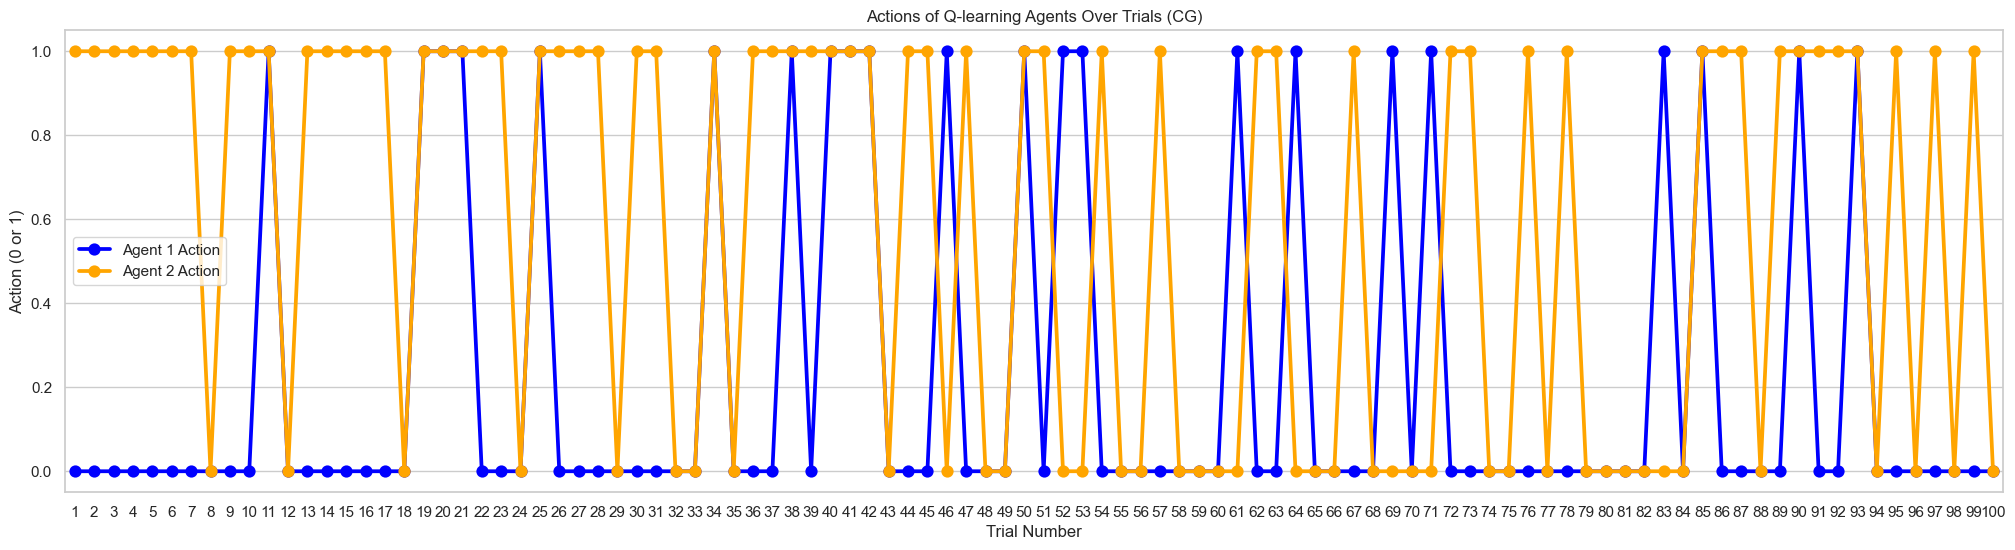

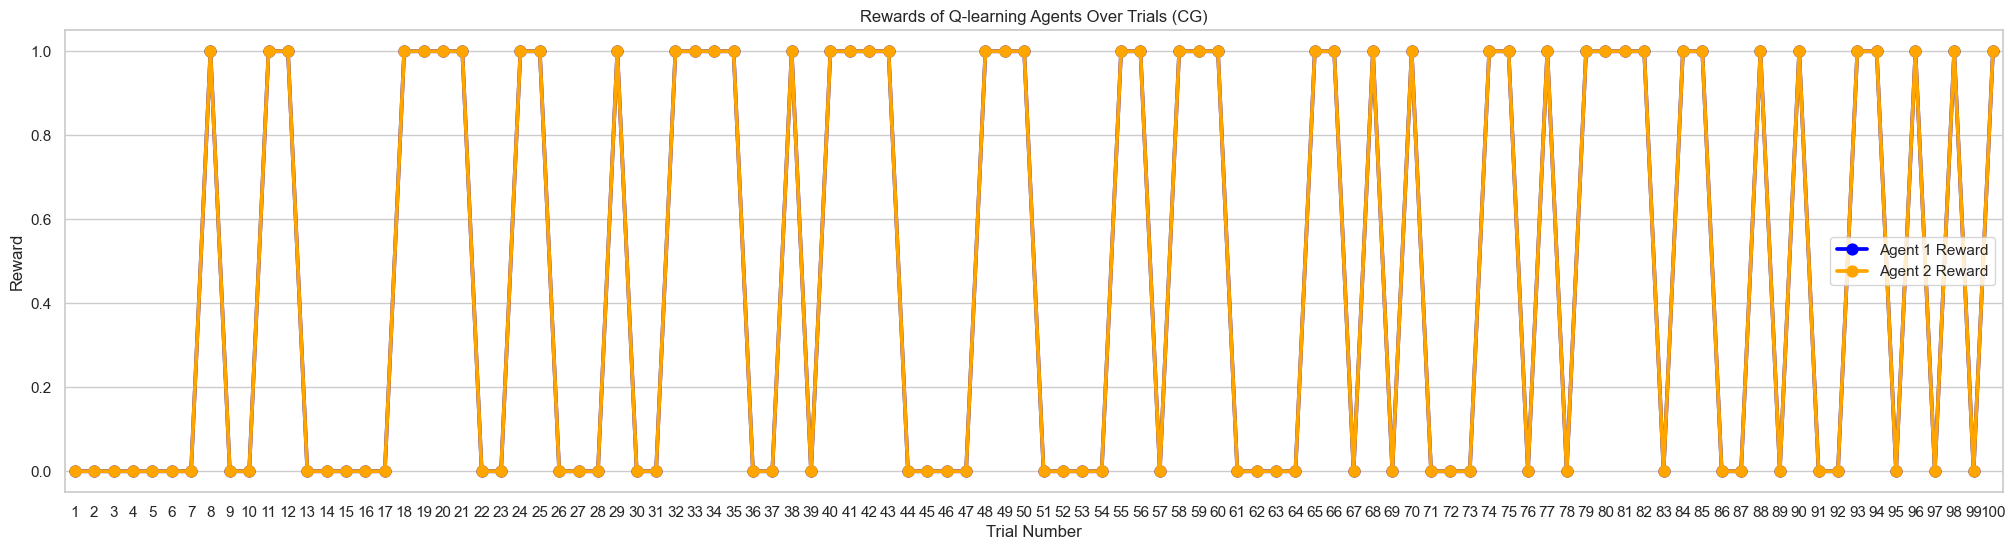

In [5]:
# Example initialization for Q-learning agents
x_init_q1 = np.random.randn(2)      # Q-values
phi_q1 = np.random.randn(2)         # [log beta, bias]
theta_q1 = np.random.randn(1)       # invsigmoid(alpha)

x_init_q2 = np.random.randn(2)      # Q-values
phi_q2 = np.random.randn(2)         # [log beta, bias]
theta_q2 = np.random.randn(1)       # invsigmoid(alpha)

agent1_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q1, phi=phi_q1, theta=theta_q1, game=payoff_matrix_CG, player_id=1)
agent2_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q2, phi=phi_q2, theta=theta_q2, game=payoff_matrix_CG, player_id=2)

# Simulate agents
history_QL = simulate_agents(agent1_QL, agent2_QL, n_trials=n_trials)

# Convert history to DataFrame for easier manipulation
history_df_QL = pd.DataFrame(history_QL)

# Plot agents actions on the same graph
sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent1_action", label="Agent 1 Action", color="blue")
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent2_action", label="Agent 2 Action", color="orange")
plt.title("Actions of Q-learning Agents Over Trials (CG)")
plt.xlabel("Trial Number")
plt.ylabel("Action (0 or 1)")
plt.legend()
plt.show()

# Plot agents rewards on the same graph
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent1_reward", label="Agent 1 Reward", color="blue")
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent2_reward", label="Agent 2 Reward", color="orange")
plt.title("Rewards of Q-learning Agents Over Trials (CG)")
plt.xlabel("Trial Number")  
plt.ylabel("Reward")
plt.legend()
plt.show()

Qu.1.a) Now do the same for the HaS.

Qu.1.b) Simulate games for different agents in the HaS and CG.

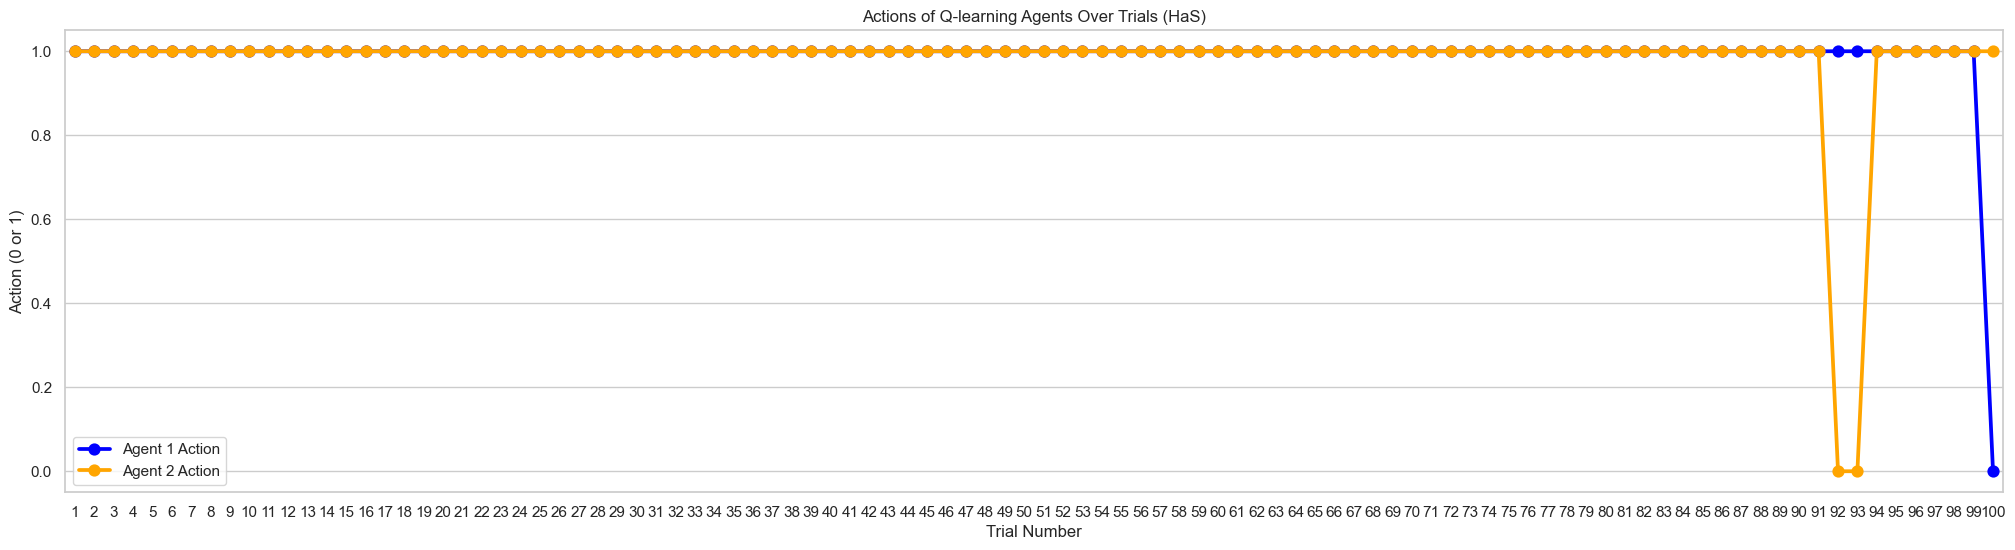

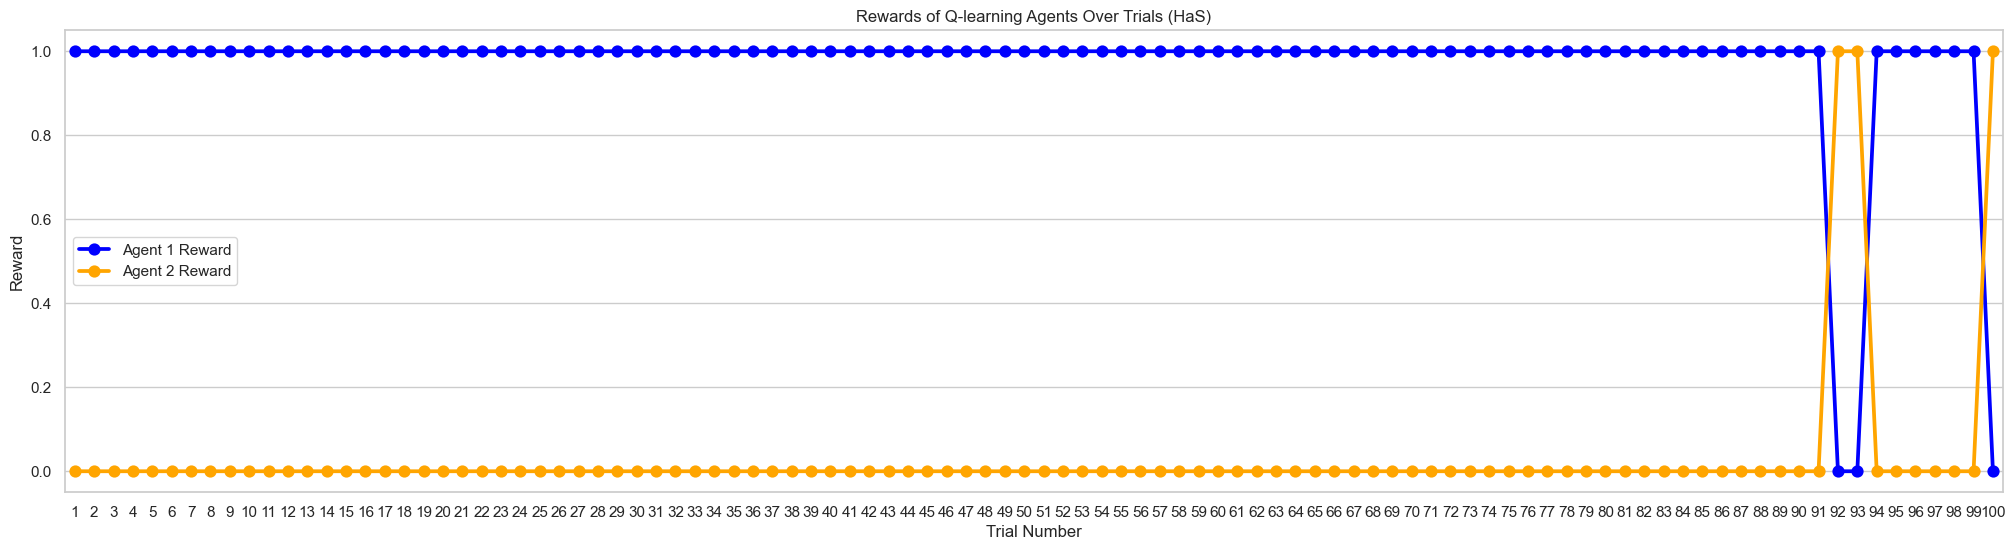

In [6]:
# Example initialization for Q-learning agents
x_init_q1 = np.random.randn(2)      # Q-values
phi_q1 = np.random.randn(2)         # [log beta, bias]
theta_q1 = np.random.randn(1)       # invsigmoid(alpha)

x_init_q2 = np.random.randn(2)      # Q-values
phi_q2 = np.random.randn(2)         # [log beta, bias]
theta_q2 = np.random.randn(1)       # invsigmoid(alpha)

agent1_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q1, phi=phi_q1, theta=theta_q1, game=payoff_matrix_HaS, player_id=1)
agent2_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q2, phi=phi_q2, theta=theta_q2, game=payoff_matrix_HaS, player_id=2)

# Simulate agents
history_QL = simulate_agents(agent1_QL, agent2_QL, n_trials=n_trials)

# Convert history to DataFrame for easier manipulation
history_df_QL = pd.DataFrame(history_QL)

# Plot agents actions on the same graph
sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent1_action", label="Agent 1 Action", color="blue")
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent2_action", label="Agent 2 Action", color="orange")
plt.title("Actions of Q-learning Agents Over Trials (HaS)")
plt.xlabel("Trial Number")
plt.ylabel("Action (0 or 1)")
plt.legend()
plt.show()

# Plot agents rewards on the same graph
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent1_reward", label="Agent 1 Reward", color="blue")
sns.pointplot(data=history_df_QL, x="trial_nb", y="agent2_reward", label="Agent 2 Reward", color="orange")
plt.title("Rewards of Q-learning Agents Over Trials (HaS)")
plt.xlabel("Trial Number")  
plt.ylabel("Reward")
plt.legend()
plt.show()

Now, let's make a QL agent play with a Mixed AA that switches between competitive and cooperative modes.

Game 1 trials: [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
Game 2 trials: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


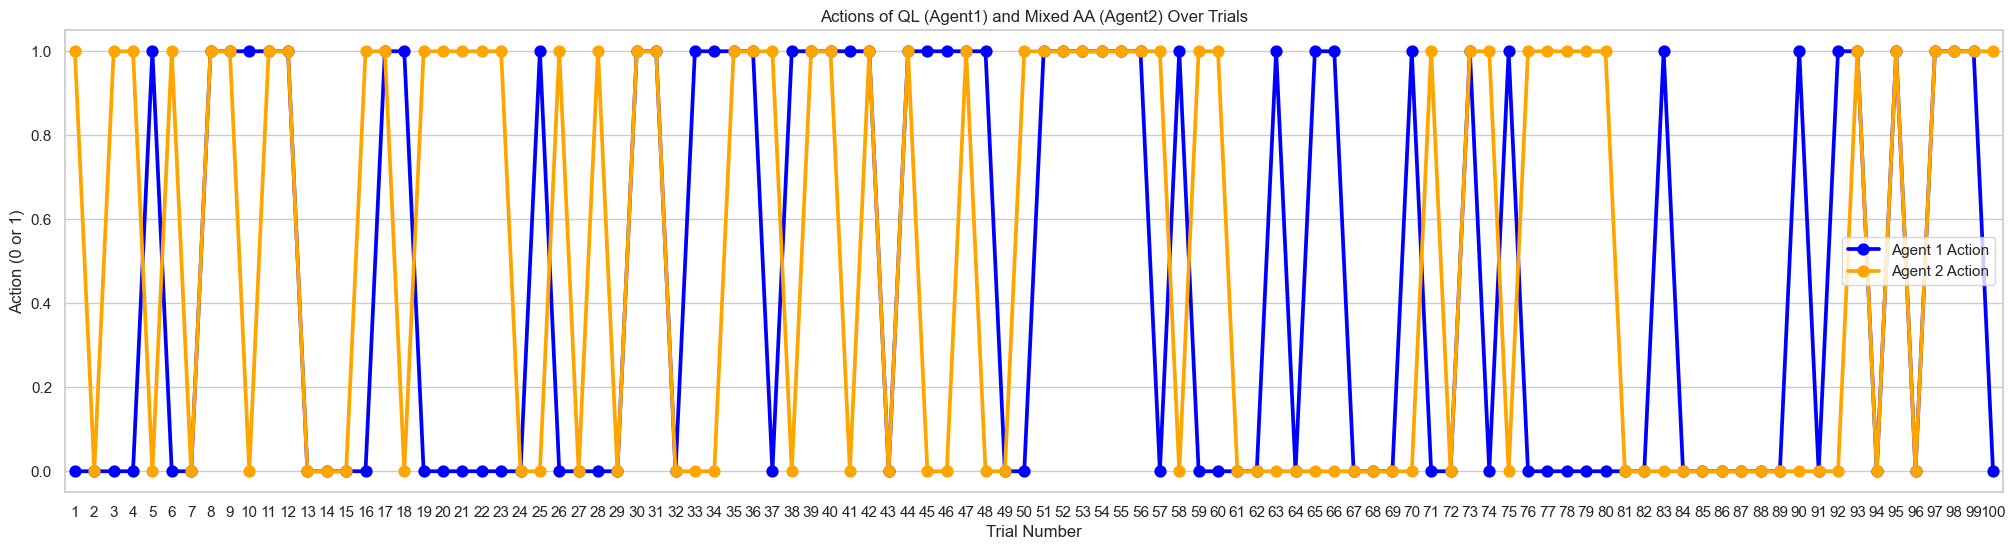

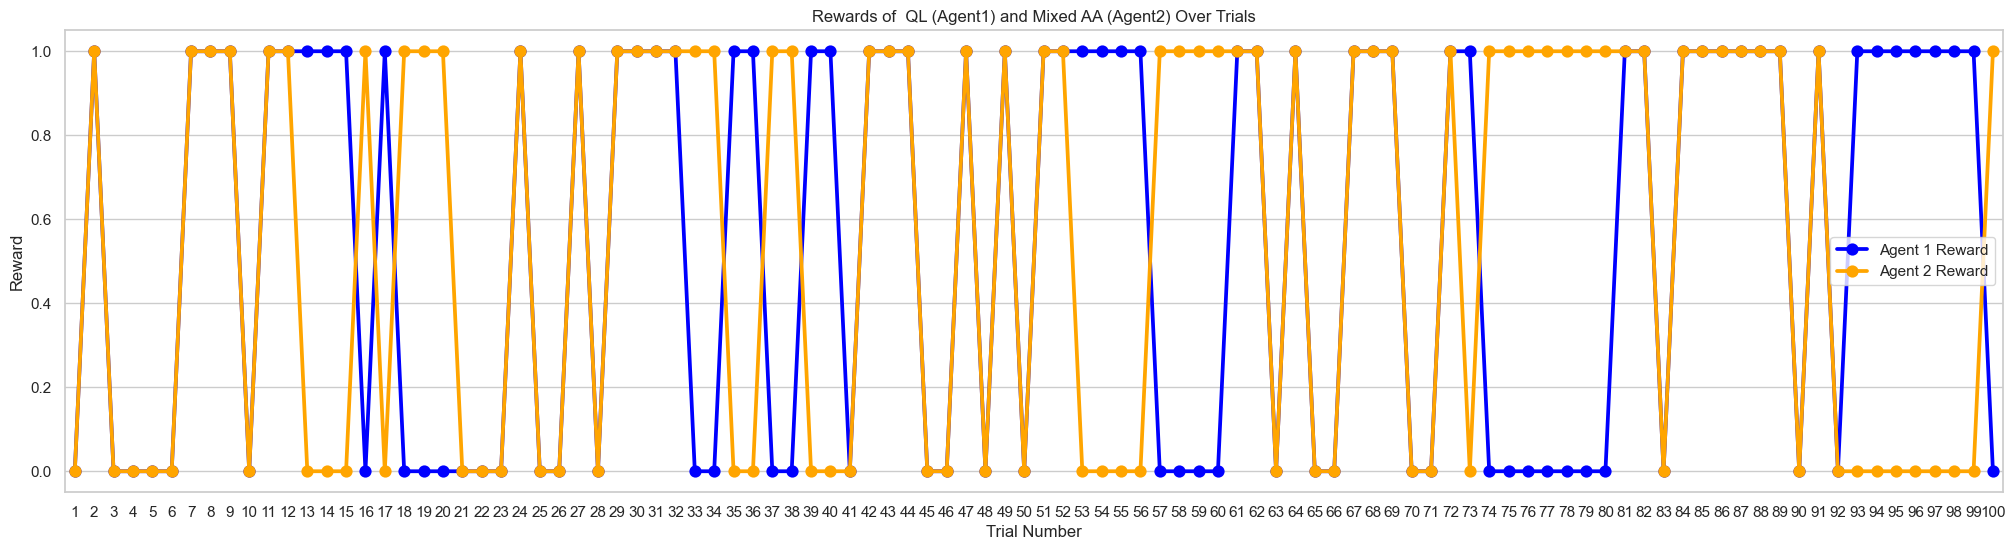

In [7]:
# Create a boolean array for game trials for the Mixed Agents that will switch between games
# Here, we assume that each block consists of block_size (e.g. 26) trials, with the first game1_size_in_blocks (e.g. 15) trials for Game 1 and the next block_size-game1_size_in_blocks for Game 2.
block_size = 20  # Size of each block
game1_size_in_blocks = 12  # Number of trials for Game 1 in each block
game1_trials = np.zeros(n_trials, dtype=int)
for start in range(0, n_trials, block_size):
    # Game 1: trials 1–game1_size_in_blocks (0-based: start to start+game1_size_in_blocks)
    game1_trials[start:start + game1_size_in_blocks] = 1
game2_trials = 1-game1_trials  # Game 2 is the opposite of Game 1
print("Game 1 trials:", game1_trials)
print("Game 2 trials:", game2_trials)

# Example initialization for Q-learning agents
x_init_q1 = np.random.randn(2)      # Q-values
phi_q1 = np.random.randn(2)         # [log beta, bias]
theta_q1 = np.random.randn(1)       # invsigmoid(alpha)

agent1_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q1, phi=phi_q1, theta=theta_q1, game=payoff_matrix_CG, player_id=1)
agent2_Mixed_AA = MixedAgent(f_func=f_Mixed_AA, g_func=g_Mixed_AA, x_init=x_init_AA, phi=None, theta=None,
                        game1=payoff_matrix_CG, game2=payoff_matrix_HaS, game1_trials=game1_trials, game2_trials=game2_trials, player_id=2)

# Simulate agents
history_QL_vs_Mixed_AA = simulate_agents(agent1_QL, agent2_Mixed_AA, n_trials=n_trials)

# Convert history to DataFrame for easier manipulation
history_df_QL_vs_Mixed_AA = pd.DataFrame(history_QL_vs_Mixed_AA)

# Plot agents actions on the same graph
sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL_vs_Mixed_AA, x="trial_nb", y="agent1_action", label="Agent 1 Action", color="blue")
sns.pointplot(data=history_df_QL_vs_Mixed_AA, x="trial_nb", y="agent2_action", label="Agent 2 Action", color="orange")
plt.title("Actions of QL (Agent1) and Mixed AA (Agent2) Over Trials")
plt.xlabel("Trial Number")
plt.ylabel("Action (0 or 1)")
plt.legend()
plt.show()

# Plot agents rewards on the same graph
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_QL_vs_Mixed_AA, x="trial_nb", y="agent1_reward", label="Agent 1 Reward", color="blue")
sns.pointplot(data=history_df_QL_vs_Mixed_AA, x="trial_nb", y="agent2_reward", label="Agent 2 Reward", color="orange")
plt.title("Rewards of  QL (Agent1) and Mixed AA (Agent2) Over Trials")
plt.xlabel("Trial Number")  
plt.ylabel("Reward")
plt.legend()
plt.show()

Qu.2.a) What can you observe for the rewards of the different agents? 

Qu.2.b) Simulate a game between a MIIL agent vs a Mixed AA.

Qu.2.c) What can you observe for the rewards of the different agents?

Qu.2.d) What happens if you simulate longer games with more trials? 

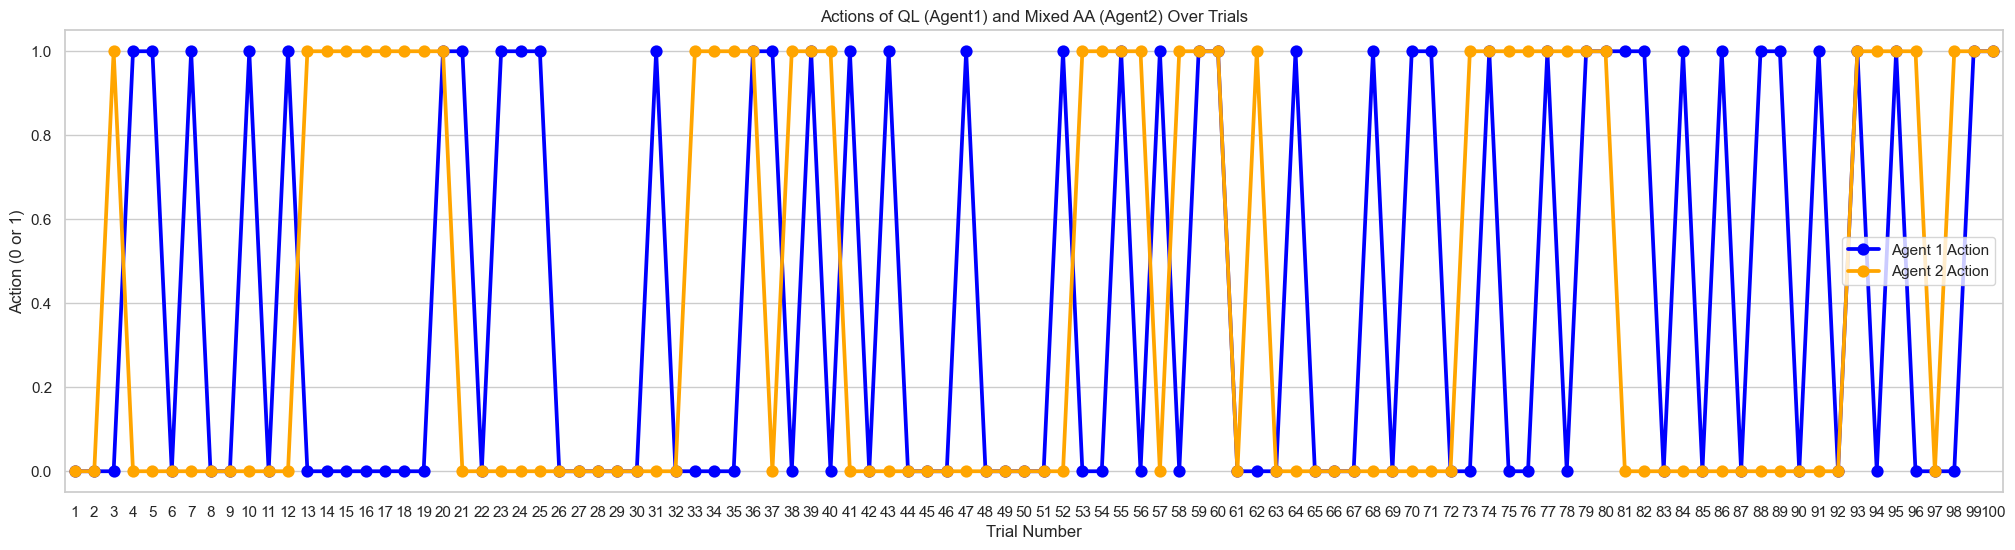

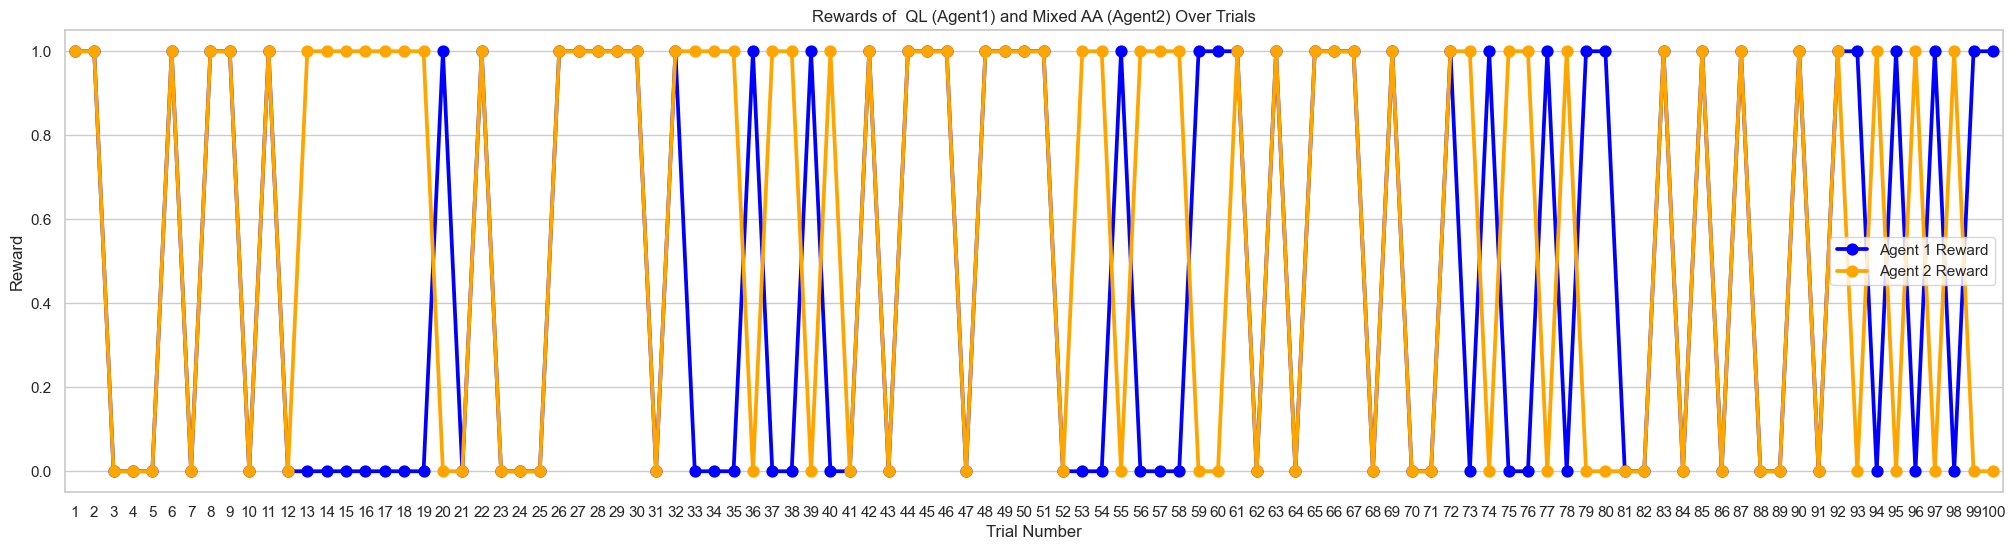

In [8]:
# Example initialization for MIIL agent
x_init_miil = np.random.randn(3)   # beliefs for game1, game2, and mixing weight
phi_miil = np.random.randn(2)      # [log beta, bias]
theta_miil = np.random.randn(5)    # [inv_eta, inv_lambda, log beta]

agent1_MIIL = MixedAgent(f_func=f_MIIL, g_func=g_MIIL, x_init=x_init_miil, phi=phi_miil, theta=theta_miil,
                    game1=payoff_matrix_CG, game2=payoff_matrix_HaS, game1_trials=np.ones(n_trials, dtype=bool), game2_trials=np.zeros(n_trials, dtype=bool), player_id=1)
agent2_Mixed_AA = MixedAgent(f_func=f_Mixed_AA, g_func=g_Mixed_AA, x_init=x_init_AA, phi=None, theta=None,
                        game1=payoff_matrix_CG, game2=payoff_matrix_HaS, game1_trials=game1_trials, game2_trials=game2_trials, player_id=2)

# Simulate agents
history_MIIL_vs_Mixed_AA = simulate_agents(agent1_MIIL, agent2_Mixed_AA, n_trials=n_trials)

# Convert history to DataFrame for easier manipulation
history_df_MIIL_vs_Mixed_AA = pd.DataFrame(history_MIIL_vs_Mixed_AA)

# Plot agents actions on the same graph
sns.set(style="whitegrid")
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_MIIL_vs_Mixed_AA, x="trial_nb", y="agent1_action", label="Agent 1 Action", color="blue")
sns.pointplot(data=history_df_MIIL_vs_Mixed_AA, x="trial_nb", y="agent2_action", label="Agent 2 Action", color="orange")
plt.title("Actions of QL (Agent1) and Mixed AA (Agent2) Over Trials")
plt.xlabel("Trial Number")
plt.ylabel("Action (0 or 1)")
plt.legend()
plt.show()

# Plot agents rewards on the same graph
plt.figure(figsize=(25, 6))
sns.pointplot(data=history_df_MIIL_vs_Mixed_AA, x="trial_nb", y="agent1_reward", label="Agent 1 Reward", color="blue")
sns.pointplot(data=history_df_MIIL_vs_Mixed_AA, x="trial_nb", y="agent2_reward", label="Agent 2 Reward", color="orange")
plt.title("Rewards of  QL (Agent1) and Mixed AA (Agent2) Over Trials")
plt.xlabel("Trial Number")  
plt.ylabel("Reward")
plt.legend()
plt.show()

Let's now run multiple game simulations and look at the average reward for each model against any other given model. We want to see if there is an advantage for any model against the others.

In [9]:
nb_sim = 100
n_trials = 300  # Total number of trials for each simulation

# Create a boolean array for game trials for the Mixed Agents that will switch between games
# Here, we assume that each block consists of block_size (e.g. 26) trials, with the first game1_size_in_blocks (e.g. 15) trials for Game 1 and the next block_size-game1_size_in_blocks for Game 2.
block_size = 20  # Size of each block
game1_size_in_blocks = 12  # Number of trials for Game 1 in each block
game1_trials = np.zeros(n_trials, dtype=int)
for start in range(0, n_trials, block_size):
    # Game 1: trials 1–game1_size_in_blocks (0-based: start to start+game1_size_in_blocks)
    game1_trials[start:start + game1_size_in_blocks] = 1
game2_trials = 1-game1_trials  # Game 2 is the opposite of Game 1
print("Game 1 trials:", game1_trials)
print("Game 2 trials:", game2_trials)

full_sims_hist = []

Game 1 trials: [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0]
Game 2 trials: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1

Qu.3.a) Fill the following block of code to run nb_sim simulations of different agents playing against each others.

Qu.3.b) Is there any advantage of using one model vs another? Is ToM always useful? How come? 

In [ ]:
for sim in range(nb_sim):    
    # Example for Q-learning agent
    x_init_q = np.random.randn(2)      # Q-values
    phi_q = np.random.randn(2)         # [log beta, bias]
    theta_q = np.random.randn(1)       # invsigmoid(alpha)

    # Example for Fictitious learner
    x_init_FP = np.random.randn(2)    # Q-values
    phi_FP = np.random.randn(2)       # [log beta, bias]
    theta_FP = np.random.randn(1)     # [inv_eta]

    # Example for Influence learner
    x_init_inf = np.random.randn(1)    # log-odds(P(o=1))
    phi_inf = np.random.randn(2)       # [log beta, bias]
    theta_inf = np.random.randn(3)     # [inv_eta, inv_lambda, log beta]

    # Example for MIIL (Mixed-Intentions Influence Learner)
    x_init_miil = np.random.randn(3)   # beliefs for game1, game2, and mixing weight
    phi_miil = np.random.randn(2)      # [log beta, bias]
    theta_miil = np.random.randn(5)    # [inv_eta, inv_lambda, log beta]

    # Initialize agents
    agent1_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q, phi=phi_q, theta=theta_q, game=payoff_matrix_CG, player_id=1)
    agent1_FP = Agent(f_func=f_fictitious_learner, g_func=g_fictitious_learner, x_init=x_init_FP, phi=phi_FP, theta=theta_FP, game=payoff_matrix_CG, player_id=1)
    agent1_Inf = Agent(f_func=f_influence_learner, g_func=g_influence_learner, x_init=x_init_inf, phi=phi_inf, theta=theta_inf, game=payoff_matrix_CG, player_id=1)
    agent1_MIIL = MixedAgent(f_func=f_MIIL, g_func=g_MIIL, x_init=x_init_miil, phi=phi_miil, theta=theta_miil,
                    game1=payoff_matrix_CG, game2=payoff_matrix_HaS, game1_trials=np.ones(n_trials, dtype=bool), game2_trials=np.zeros(n_trials, dtype=bool), player_id=1)

    agent2_QL = Agent(f_func=f_Qlearning, g_func=g_Qlearning, x_init=x_init_q, phi=phi_q, theta=theta_q, game=payoff_matrix_CG, player_id=2)
    agent2_FP = Agent(f_func=f_fictitious_learner, g_func=g_fictitious_learner, x_init=x_init_q, phi=phi_q, theta=theta_q, game=payoff_matrix_CG, player_id=2)
    agent2_Inf = Agent(f_func=f_influence_learner, g_func=g_influence_learner, x_init=x_init_inf, phi=phi_inf, theta=theta_inf, game=payoff_matrix_CG, player_id=2)
    agent2_Mixed_AA = MixedAgent(f_func=f_Mixed_AA, g_func=g_Mixed_AA, x_init=x_init_AA, phi=None, theta=None,
                        game1=payoff_matrix_CG, game2=payoff_matrix_HaS, game1_trials=game1_trials, game2_trials=game2_trials, player_id=2)

    agents1_dict_list = [{'model': 'QL','agent':agent1_QL}, {'model': 'FP','agent':agent1_FP}, {'model': 'Inf','agent':agent1_Inf}, {'model': 'MIIL','agent':agent1_MIIL}]
    agents2_dict_list = [{'model': 'QL','agent':agent2_QL}, {'model': 'FP','agent':agent2_FP}, {'model': 'Inf','agent':agent2_Inf}, {'model': 'Mixed_AA','agent':agent2_Mixed_AA}]
    # Run simulation
    for entry1 in agents1_dict_list:
        for entry2 in agents2_dict_list:
            mod1 = entry1['model']
            mod2 = entry2['model']
            agent1 = entry1['agent']
            agent2 = entry2['agent']

            # Reset agents
            agent1.history = []
            agent2.history = []
            agent1.x = agent1.x_init
            agent2.x = agent2.x_init

            # Simulate the agents
            history = simulate_agents(agent1, agent2, n_trials)

            # Save simulation history
            full_sims_hist.append({
                'sim_id': sim,
                'model': mod1,
                'other_agent': mod2,
                'agent1': agent1,
                'agent2': agent2,
                'history': history,
                'total_reward': sum([trial_data["agent1_reward"] for trial_data in history])
            })

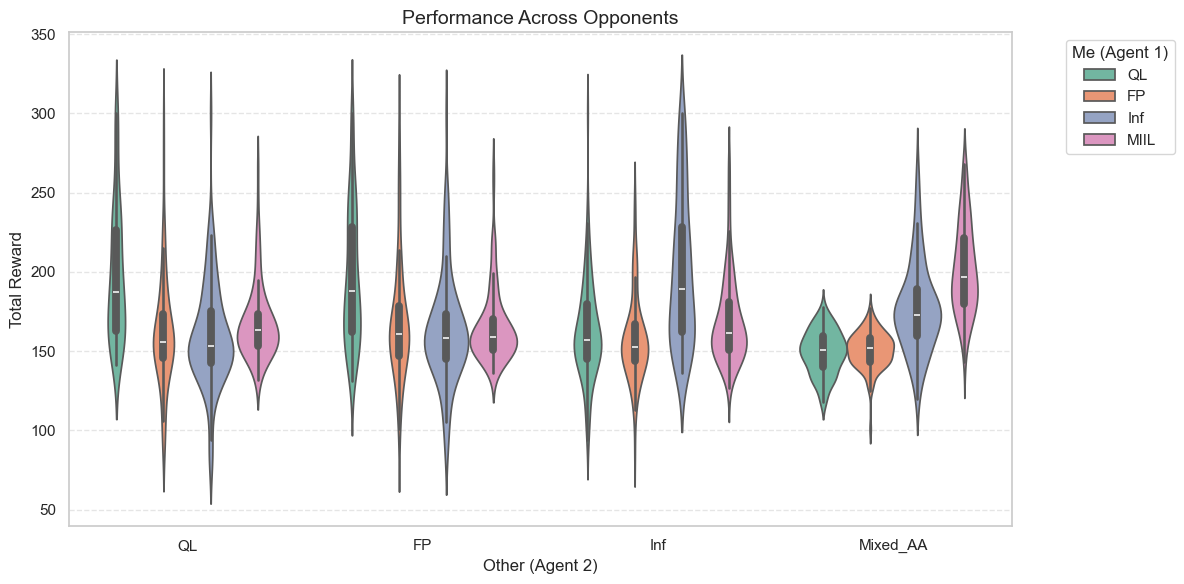

In [11]:
# Plot the results of the simulations

# Conversion to dataframes
df_models = pd.DataFrame(full_sims_hist)

# Violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x='other_agent', y='total_reward', hue='model', data=df_models, split=False, palette='Set2')

# Style
plt.title('Performance Across Opponents', fontsize=14)
plt.ylabel('Total Reward')
plt.xlabel('Other (Agent 2)')
plt.legend(title='Me (Agent 1)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# Model Fitting

## Why Do We Fit Models?
If we consider a set of data drawn from an unknown process, for example the consecutive choices of a participant in a game, the question that we want to address is “what is the process that generated these data?”. Computational models are propositions of candidate processes that could have generated such data, summed up into mathematical equations. To make it simple, you can see these mathematical equations, or computational models, as constituted by “bricks”. These bricks are more or less easily interpretable and they modulate the behaviour predicted by the model. Our aim is to identify the best fitting model to our data, because its core mechanisms, or bricks, are good candidate mechanisms that could explain the data generation process. And to do so, we have to find the best learning parameters ($\theta$ and $\phi$) of each model for our data.

<img src="images\Model_blocks.jpg" alt="Models are built with 'blocks'" width="1000"/>

In summary:
- Computational models help explain behavior in social games.
- Parameters (e.g., learning rates, belief depths) are latent and must be inferred.
- **Model fitting** is the process of estimating these unobserved parameters from observed behavior.


## General Approaches to Model Fitting

Different approaches exist to fit models. The 3 main ones are:

### Maximum Likelihood Estimation (MLE) – “Let the Data Speak”

#### Core Idea:
- Finds the model that makes the observed data most likely, without considering anything else (like prior beliefs).
- Estimates parameters that **maximize the likelihood** of observed data, i.e. P(data | parameters).

NB: most often, we work with the Log-Likelihood (LL) rather than the likelihood for (computational) practical reasons. 

#### Example:
You flip a coin 10 times and get 7 heads. You want to estimate the probability of heads, say θ.

MLE asks: “Which value of θ makes it most likely that you would get 7 heads out of 10?”

Answer: θ = 0.7

The estimate will be a single value, based purely on the data.

### Maximum a Posteriori (MAP) – “Let the Data Speak, but Consider Your Beliefs Too”

#### Core Idea:
- Like MLE, but you also include prior beliefs about what values are likely, using Bayes’ Rule.
- It incorporates **prior beliefs** about parameters.
- MAP = argmax [ likelihood × prior ]

Reminder of Bayes' Rule:
$$
posterior = \frac{likelihood * prior}{evidence}
$$

This can be illustrated as follows:

<img src="images\Bayes_inference.jpg" alt="Bayes inference rule" width="550"/>

For the observed data $x$ and model parameters $\theta$, this gives:
$$
p(\theta|x) = \frac{p(x|\theta)*p(\theta)}{p(x)}
$$

#### Example:
With the same example as previously, suppose you believe the coin is fair, i.e., θ is probably close to 0.5, before seeing any flips.

MAP combines:

- Likelihood (what the data says)
- Prior (what you believed before)

MAP asks:

“Given the data and my prior belief, which value of θ is most likely?”

Depending on the strength of your prior beliefs, the answer might now be, for example: θ = 0.65 (slight prior belief of coin fairness, which slightly pulls θ toward 0.5 compared to previously with MLE).

The estimate will be, again, a single value, based not only on the data but also on your prior beliefs.

### Bayesian Inference – “Use the Whole Distribution”

#### Core Idea:
- Don’t just pick the most likely value—keep the entire distribution of possible values, to represent uncertainty.
- Estimates a **posterior distribution** over parameters.
- Supports uncertainty quantification and model comparison.

#### Example:
Instead of saying “θ = 0.7” or “θ = 0.65”, Bayesian inference says:
“Given my data and prior, here’s the full posterior distribution over θ.”

This gives you:
- A most likely value (~max of the distribution)
- A range of plausible values (~distribution values within a standard deviation centered around the max)
- A sense of uncertainty (~standard deviation)

The estimate will be a distribution, and not a single value anymore as in MLE and MAP.

We will focus today on *Bayesian Inference*.

### From Bayesian Inference to (Stochastic) Variational Inference
- Exact inference is often intractable.
- **Variational Inference (VI)** approximates the true posterior with a simpler distribution.
- The goal is to optimize this distribution to be close to the real posterior.
- Stochastic Variational Inference (SVI) uses stochastic gradient descent (e.g., Adam).
- Optimizes the **Evidence Lower Bound (ELBO)** (see https://pyro.ai/examples/svi_part_i.html#ELBO for more details).
- Implemented in libraries like **Pyro**, **NumPyro**, **TensorFlow Probability** (Python) or **VBA-toolbox** (Matlab).

Let's now fit our models to some of our generated data.

In [12]:
# Initialize Pyro models and guides
pyro_models = {
    "QL": (q_learning_pyro_model, guide_Qlearn),
    "FP": (fictitious_learner_pyro_model, guide_FPlayer),
    "Inf": (influence_learning_pyro_model, guide_influence_learning),
    "MIIL": (MIIL_pyro_model, guide_MIIL)
}

# Collect unique models
all_models = set(pyro_models.keys())

Qu.4.a) Fill the following code cell to fit the 4 models defined in the dictionary "pyro_models" to your data.

Qu.4.b) Try different values for n_steps, tolerance and patience. What happens? What are these parameters used for? 

Fitting model QL
[0] ELBO: -495.49, Best: -495.49
[100] ELBO: -309.58, Best: -91.71
Early stopping at step 107: no improvement in 50 steps.
Best parameters found:{'alpha_loc': tensor(-0.0095), 'beta_loc': tensor(0.0118), 'bias_loc': tensor(-0.0119)}


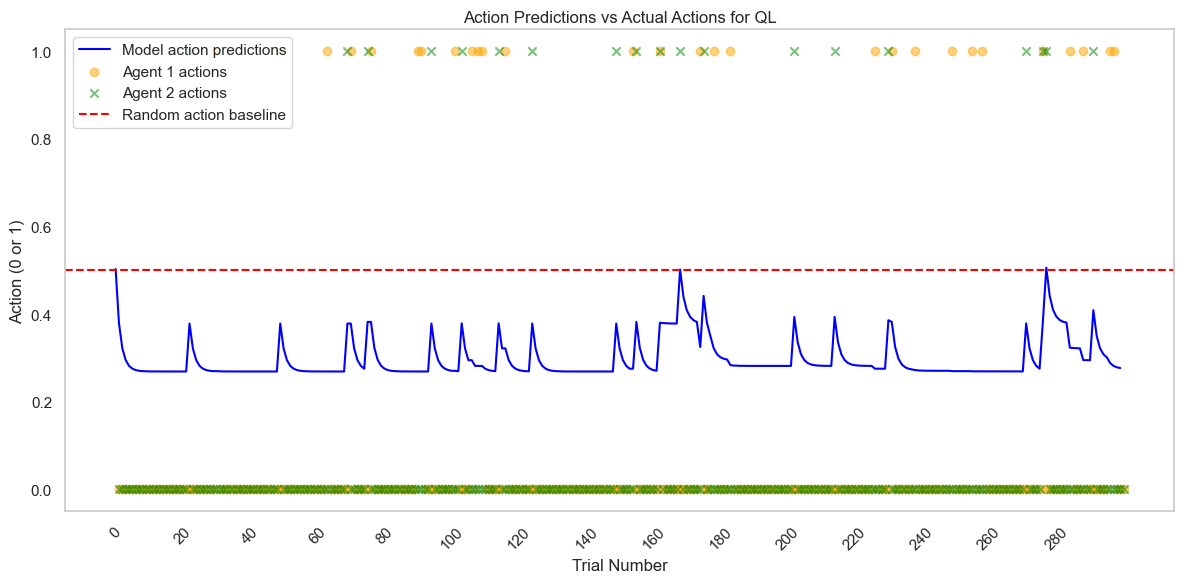

Model QL accuracy: 0.90
Model QL balanced accuracy: 0.49
Model QL log likelihood: -129.21
Fitting model FP
[0] ELBO: -123.36, Best: -123.36


c:\Users\tnong\Desktop\These\Prog_Courses\CIX_SummerSchool\CIX_course_Modelling_ToM_functions.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-slope * (x - center)))


Early stopping at step 90: no improvement in 50 steps.
Best parameters found:{'alpha_loc': tensor(-0.0022), 'beta_loc': tensor(-0.0036), 'bias_loc': tensor(-0.0011)}


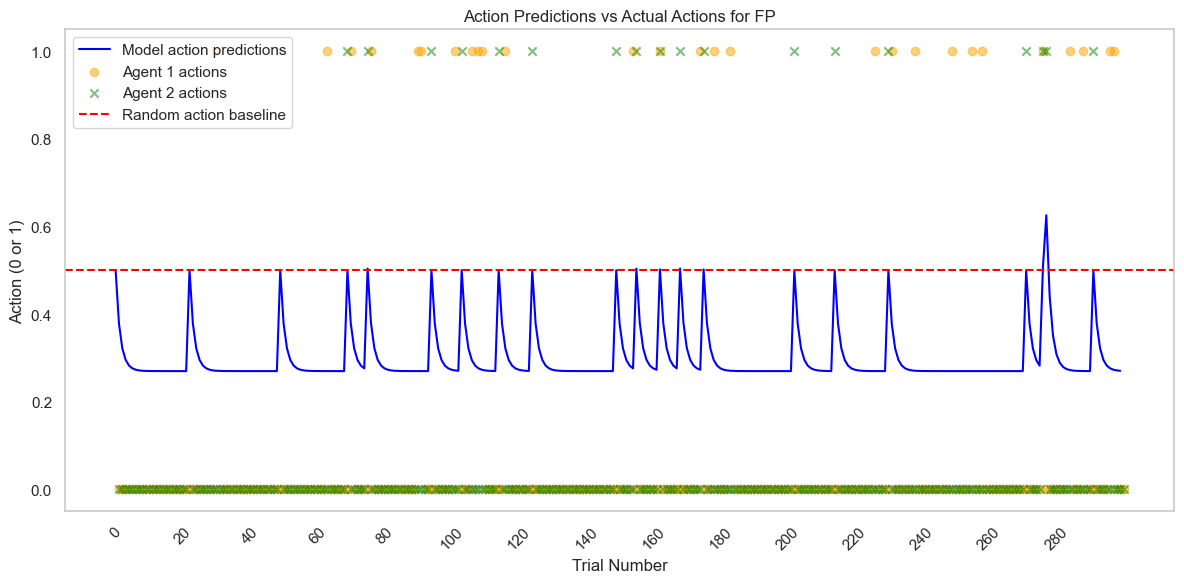

Model FP accuracy: 0.86
Model FP balanced accuracy: 0.52
Model FP log likelihood: -131.33
Fitting model Inf
[0] ELBO: -178.29, Best: -178.29
[100] ELBO: -4633.90, Best: -92.22
Early stopping at step 109: no improvement in 50 steps.
Best parameters found:{'eta_loc': tensor(-0.0048), 'lambd_loc': tensor(-0.0015), 'beta_opp_loc': tensor(-0.0036), 'beta_loc': tensor(-0.0129), 'bias_loc': tensor(0.0008)}


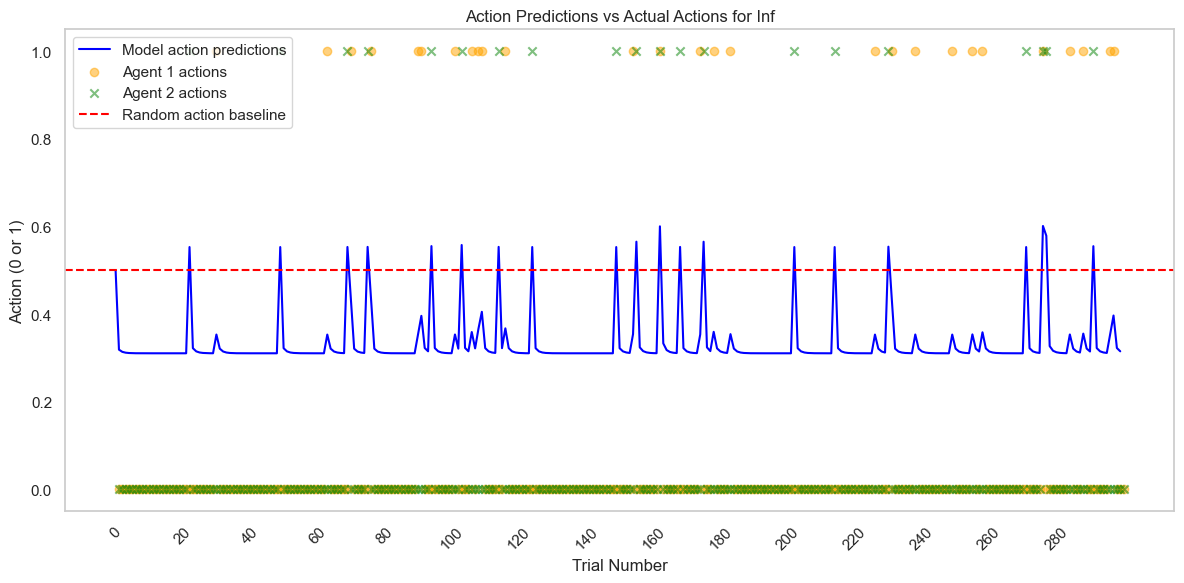

Model Inf accuracy: 0.86
Model Inf balanced accuracy: 0.52
Model Inf log likelihood: -141.84
Fitting model MIIL
[0] ELBO: -2833.22, Best: -2833.22
Early stopping at step 80: no improvement in 50 steps.
Best parameters found:{'eta_loc': tensor(-0.0108), 'lambd_loc': tensor(0.0044), 'beta_opp_loc': tensor(-0.0056), 'invprec_loc': tensor(0.0042), 'bias_loc': tensor(0.0079), 'beta1_loc': tensor(0.0123), 'beta2_loc': tensor(0.0015)}


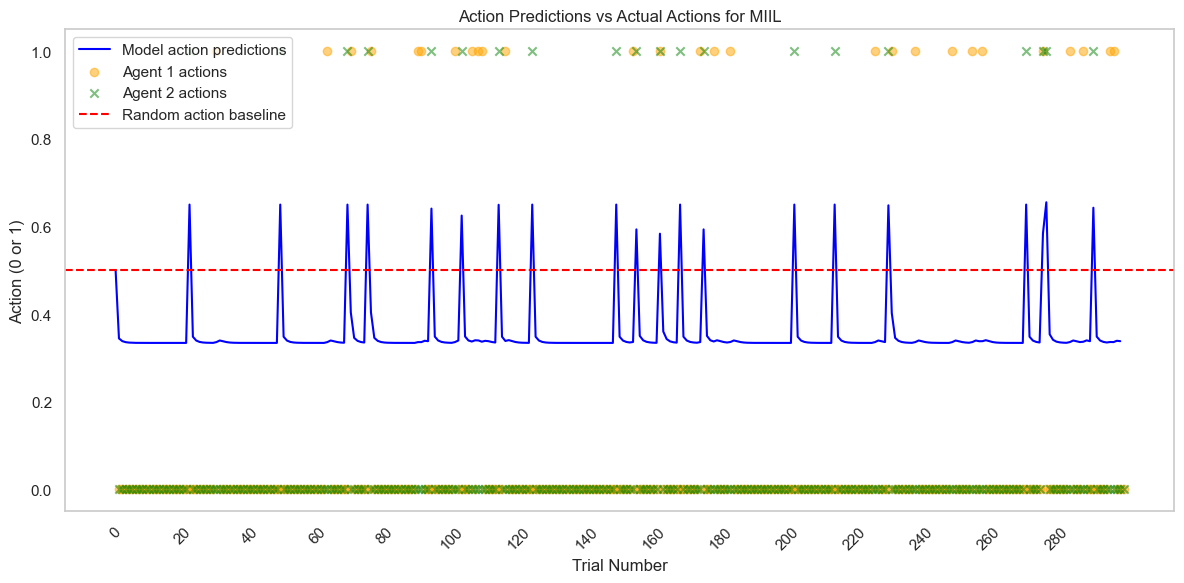

Model MIIL accuracy: 0.86
Model MIIL balanced accuracy: 0.52
Model MIIL log likelihood: -150.28


In [13]:
k = 0 # choose the index of the data in full_sims_hist that you want to fit 
sim_hist = pd.DataFrame(full_sims_hist[k]['history'])
data = {'agent1_action': sim_hist['agent1_action'], 'agent2_action': sim_hist['agent2_action'], 'agent1_reward': sim_hist['agent1_reward']}
for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
    print((f"Fitting model {fitted_model_name}"))

    if(fitted_model_name=="MIIL"):
        in_dict = {'game1': payoff_matrix_CG, 'game2': payoff_matrix_HaS, 'player': 1, 'dim_x': 3}
    elif(fitted_model_name=="Inf"):
        in_dict = {'game': payoff_matrix_CG, 'player': 1, 'dim_x': 1}
    else:
        in_dict = {'dim_x': 2}

    res = fit_model(data = data, model_fn = model_fn, guide_fn = guide_fn, in_dict = in_dict, n_steps=500, tolerance=1e-4, verbose=True, patience=50)
    goodness_of_fit = compute_goodness_of_fit(res, data)
    
    # Plot the results of the fitting
    plot_fit_results(res, sim_hist, fitted_model_name, n_trials)

    # Model accuracy
    accuracy = goodness_of_fit['accuracy']
    print(f"Model {fitted_model_name} accuracy: {accuracy:.2f}")

    # Model balanced accuracy
    balanced_accuracy = goodness_of_fit['balanced_accuracy']
    print(f"Model {fitted_model_name} balanced accuracy: {balanced_accuracy:.2f}")

    # Model log likelihood
    log_likelihood = goodness_of_fit['log_likelihood']
    print(f"Model {fitted_model_name} log likelihood: {log_likelihood:.2f}")



Qu.5.a) We have fitted different models to some of our simulated data. Which model should we choose to explain our data? Based on what criterion? 

Qu.5.b) Can you find some limits to using accuracy, balanced accuracy, and log-likelihood to compare different models?

## Model Comparison 
### Why Compare Models?
- Multiple models may explain the same behavior.
- **Model comparison** helps us decide which model best accounts for the data.

### Key Metrics
- **Log Likelihood** (LL)
$$
LL = ln(P(x|\theta,\phi))
$$
- **AIC** (Akaike Information Criterion) / **BIC** (Bayesian Information Criterion): penalized likelihood criteria
$$
AIC = -2*(LL - n_{params})
$$

$$
BIC = -2*(LL - \frac{n_{params}*ln(n_{trials})}{2})
$$

- **ELBO** (evidence lower bound): 
$$
ELBO=(Reconstruction accuracy)−(Regularization penalty)
$$
Maximizing ELBO improves the fit to the data (see https://pyro.ai/examples/svi_part_i.html#ELBO).

### Fixed vs. Random Effects for model comparison
- Fixed-effect analysis (FFX): assumes that a single model best describes all subjects (although subjects might still differ between each other with different model parameters).

<img src="images\ffxbms.jpg" alt="FFX BMS" width="200"/>

The same **model $m$** generated the **data $y_k$** of each **subject $k$** (possibly with different **model parameters $\theta$ and $\phi$**).

To do a FFX model comparison:
1. Choose your (log-) model evidence, i.e. criterion of comparison (e.g. AIC, BIC, ELBO...).
2. For each subject, fit each model and get the corresponding model evidence (AIC, BIC, ELBO...).
3. Sum or average the evidences over subjects for each model.
4. Select the lowest (or highest, depending on the chosen criterion) model evidence to select the best model for the group.

- Random-effect analysis (RFX): assumes that your group is drawn from a population where each model is present in different proportions, with an unknown population distribution (described in terms of model frequencies/proportions)

<img src="images\rfxbms.jpg" alt="RFX BMS" width="200"/>

Your population has a **model frequency profile $r$** (repartition of the models in the population) from which each **subject $k$** has a given **model $m_k$** and generated the **data $y_k$**. 

To do a RFX model comparison:
1. Choose your (log-) model evidence, i.e. criterion of comparison (e.g. AIC, BIC, ELBO...).
2. For each subject, fit each model and get the corresponding model evidence (AIC, BIC, ELBO...).
3. For each subject, select the lowest (or highest, depending on the chosen criterion) model evidence to select the best model among the tested models for the subject.
4. Compute model frequencies (frequency at which each model was selected as the best model). You can also compute model exceedance probabilities (measures how likely it is that any given model is more frequent than all other models in the comparison set, see Stephan et al., Neuroimage 2009 for more details).

In summary:
- **Fixed effects (FFX)**: assumes one best model across all participants.
- **Random effects (RFX)**: allows for individual variability.

> Tools like `pyBMS`, `SPM`, or custom Dirichlet estimation can help implement RFX comparisons.


Qu.6.a) Fill the following to fit multiple simulated agents with all 4 models.

Qu.6.b) Compute the AIC and BIC for each fitted model and subject.

In [14]:
fit_result = []
nb_sbj = 4 # Choose the number of simulated subjects to fit
for k in range(nb_sbj):
    sim_hist = pd.DataFrame(full_sims_hist[k]['history'])
    data = {'agent1_action': sim_hist['agent1_action'], 'agent2_action': sim_hist['agent2_action'], 'agent1_reward': sim_hist['agent1_reward']}
    for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
        print((f"Fitting model {fitted_model_name}"))

        if(fitted_model_name=="MIIL"):
            in_dict = {'game1': payoff_matrix_CG, 'game2': payoff_matrix_HaS, 'player': 1, 'dim_x': 3}
        elif(fitted_model_name=="Inf"):
            in_dict = {'game': payoff_matrix_CG, 'player': 1, 'dim_x': 1}
        else:
            in_dict = {'dim_x': 2}

        res = fit_model(data = data, model_fn = model_fn, guide_fn = guide_fn, in_dict = in_dict, n_steps=500, tolerance=1e-4, verbose=True, patience=50)
        goodness_of_fit = compute_goodness_of_fit(res, data)
        fit_result.append({'simulated_model': full_sims_hist[k]['model'], 'fitted_model': fitted_model_name, 'participant_nb': k, 'model_fit_result': res, 'goodness_of_fit': goodness_of_fit})    
            
        # Model accuracy
        accuracy = goodness_of_fit['accuracy']
        print(f"Model {fitted_model_name} accuracy: {accuracy:.2f}")

        # Model balanced accuracy
        balanced_accuracy = goodness_of_fit['balanced_accuracy']
        print(f"Model {fitted_model_name} balanced accuracy: {balanced_accuracy:.2f}")

        # Model log likelihood
        log_likelihood = goodness_of_fit['log_likelihood']
        print(f"Model {fitted_model_name} log likelihood: {log_likelihood:.2f}")

        # Model AIC
        aic = goodness_of_fit['aic']
        print(f"Model {fitted_model_name} AIC: {aic:.2f}")

        # Model BIC
        bic = goodness_of_fit['bic']
        print(f"Model {fitted_model_name} BIC: {bic:.2f}")

Fitting model QL
[0] ELBO: -903.06, Best: -903.06
[100] ELBO: -2612.71, Best: -91.40
Early stopping at step 100: no improvement in 50 steps.
Best parameters found:{'alpha_loc': tensor(-0.0042), 'beta_loc': tensor(-0.0008), 'bias_loc': tensor(-0.0101)}
Model QL accuracy: 0.90
Model QL balanced accuracy: 0.49
Model QL log likelihood: -129.77
Model QL AIC: 263.53
Model QL BIC: 270.94
Fitting model FP
[0] ELBO: -100.19, Best: -100.19
Early stopping at step 53: no improvement in 50 steps.
Best parameters found:{'alpha_loc': tensor(-0.0030), 'beta_loc': tensor(0.0028), 'bias_loc': tensor(0.0035)}
Model FP accuracy: 0.89
Model FP balanced accuracy: 0.51
Model FP log likelihood: -130.72
Model FP AIC: 265.43
Model FP BIC: 272.84
Fitting model Inf
[0] ELBO: -168.42, Best: -168.42
Early stopping at step 72: no improvement in 50 steps.
Best parameters found:{'eta_loc': tensor(0.0120), 'lambd_loc': tensor(-0.0037), 'beta_opp_loc': tensor(-0.0068), 'beta_loc': tensor(-0.0005), 'bias_loc': tensor(0.0

Qu.7 Do the FFX model comparison for different criteria (AIC, BIC, ELBO)

In [15]:
# Sum (or average) model evidence across participants for each fitted model
log_evidences = []
for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
    # print(f"Fitted model: {fitted_model_name}")
    model_fit_results = [entry['model_fit_result'] for entry in fit_result if entry['fitted_model'] == fitted_model_name]
    goodness_of_fit_results = [entry['goodness_of_fit'] for entry in fit_result if entry['fitted_model'] == fitted_model_name]
    sum_elbo = sum([r['elbo'] for r in model_fit_results])
    sum_aic = sum([r['aic'] for r in goodness_of_fit_results])
    sum_bic = sum([r['bic'] for r in goodness_of_fit_results])
    log_evidences.append({'fitted_model_name':fitted_model_name,'sum_elbo': sum_elbo, 'sum_aic': sum_aic, 'sum_bic': sum_bic})

log_evidences = pd.DataFrame(log_evidences)
# print(log_evidences)
    
# Convert to probabilities to select a model based on Bayesian Model Comparison
criteria = ['elbo','aic', 'bic']
names = list(log_evidences.fitted_model_name)
for criterion in criteria:
    minus_log_evidence = np.array(-log_evidences[f'sum_{criterion}'])
    log_evidences[f'prob_{criterion}'] = np.exp(minus_log_evidence - minus_log_evidence.max())
    log_evidences[f'prob_{criterion}'] /= log_evidences[f'prob_{criterion}'].sum()
    print(f"Bayesian Model Comparison (FFX, {criterion}):")
    for name, p in zip(names, log_evidences[f'prob_{criterion}']):
        print(f"{name}: {p:.3f}")
print(log_evidences)

Bayesian Model Comparison (FFX, elbo):
QL: 0.006
FP: 0.992
Inf: 0.002
MIIL: 0.000
Bayesian Model Comparison (FFX, aic):
QL: 0.000
FP: 0.000
Inf: 1.000
MIIL: 0.000
Bayesian Model Comparison (FFX, bic):
QL: 0.000
FP: 0.000
Inf: 1.000
MIIL: 0.000
  fitted_model_name    sum_elbo      sum_aic      sum_bic     prob_elbo  \
0                QL  320.987501  1377.963104  1407.593363  6.129117e-03   
1                FP  315.901028  1417.154192  1446.784451  9.918021e-01   
2               Inf  322.073583  1336.506773  1366.137033  2.068801e-03   
3              MIIL  494.532615  1498.915964  1528.546224  2.616452e-78   

       prob_aic      prob_bic  
0  9.902494e-19  9.902494e-19  
1  9.446508e-36  9.446508e-36  
2  1.000000e+00  1.000000e+00  
3  2.928093e-71  2.928093e-71  


Qu.8.a) Do the RFX model comparison based on the ELBO criterion.

Qu.8.b) Plot model comparison results for the model frequencies and exceedance probabilities.


RFX Model Comparison:
FP: model frequencies=0.88, exceedance prob=1.000
Inf: model frequencies=0.10, exceedance prob=0.000
MIIL: model frequencies=0.00, exceedance prob=0.000
QL: model frequencies=0.01, exceedance prob=0.000


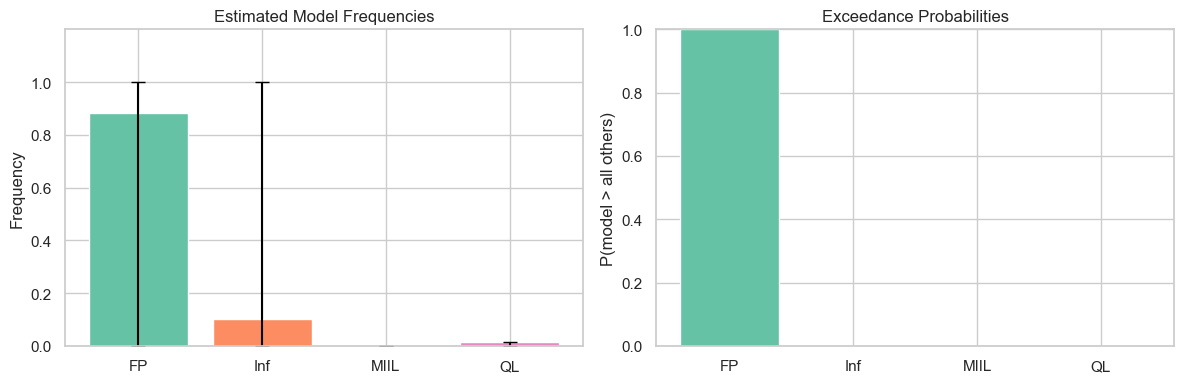

In [16]:
# Convert ELBOs to per-participant posteriors
elbo_matrix, model_names = build_elbo_matrix(fit_result)

# Estimate RFX model frequencies
alphas, xp = estimate_dirichlet_rfx(elbo_matrix)
# model_frequencies = alphas / np.sum(alphas)

# Bootstrapping
mean_alpha, ci_low, ci_high = bootstrap_alphas(elbo_matrix)
model_frequencies = mean_alpha/np.sum(alphas)
mf_ci_low = ci_low/np.sum(alphas)
mf_ci_high = ci_high/np.sum(alphas)

# Report
print("\nRFX Model Comparison:")
for name, f, p in zip(model_names, mean_alpha/ np.sum(alphas), xp):
    print(f"{name}: model frequencies={f:.2f}, exceedance prob={p:.3f}")

# Plotting
plot_rfx_model_comparison_with_ci(model_names, model_frequencies, xp, mf_ci_low, mf_ci_high)


# Sanity checks: Model recovery and parameters recovery

When you build a computational model (like to explain decision-making or behavior), it’s easy to get a good-looking fit to data—but does your model actually make sense?

Two important sanity checks help answer that:
- Parameter Recovery
- Model Recovery

## Parameter recovery – “Can I trust the numbers I’m estimating?”

Suppose your model has parameters (e.g., learning rate, risk aversion, influence weight, etc.). You simulate data with known parameter values, then fit your model and check:

Do the fitted parameters match the ones you used?

### Why does it matter?
If your model can't recover its own parameters reliably, any interpretations you make about “high learning rate” or “low risk aversion” are not trustworthy.

### How does it work?
- Pick a model and generate synthetic data using known parameters.
- Fit the model to that data.
- Compare the true vs recovered parameters.

Qu.9.a) If you plot true vs recovered parameters, what should it look like if the recovery is good? Plot with fake data points of what a good parameter recovery should look like.

Qu.9.b) Use your previously fitted data to do a parameter recovery for each parameter of different models. Start with the QL model. How is your recovery? 

Qu.9.c) What happens if you change n_steps, tolerance, patience?

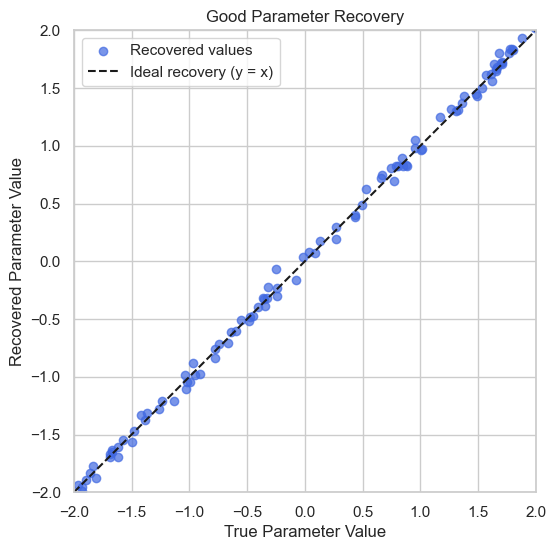

In [ ]:
#What a good parameter recovery should look like:
# Generate true parameter values
true_params = np.random.uniform(-2, 2, size=100)

# Generate "recovered" parameter values with small noise
recovered_params = true_params + np.random.normal(0, 0.05, size=true_params.shape)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(true_params, recovered_params, color='royalblue', alpha=0.7, label='Recovered values')
plt.plot([-2, 2], [-2, 2], 'k--', label='Ideal recovery (y = x)')  # Diagonal line
plt.xlabel('True Parameter Value')
plt.ylabel('Recovered Parameter Value')
plt.title('Good Parameter Recovery')
plt.legend()
plt.grid(True)
plt.axis('square')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


Plotting for model: QL
Number of parameters to plot: 2
Plotting parameter 1 for Parameter Recovery for QL: φ (phi)


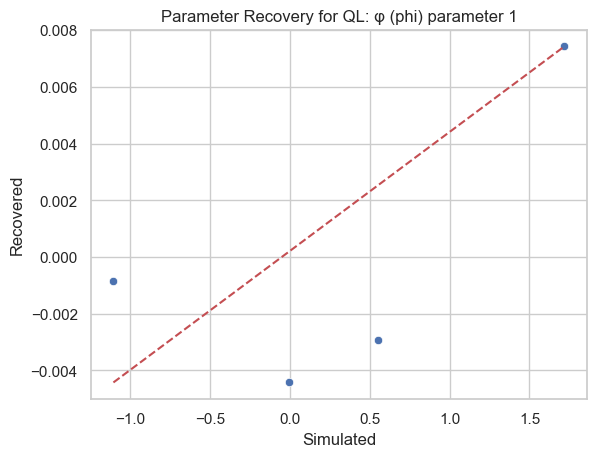

Plotting parameter 2 for Parameter Recovery for QL: φ (phi)


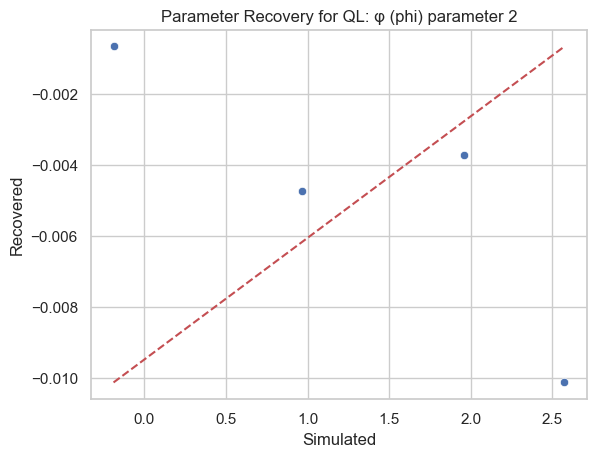

Number of parameters to plot: 1
Plotting parameter 1 for Parameter Recovery for QL: θ (theta)


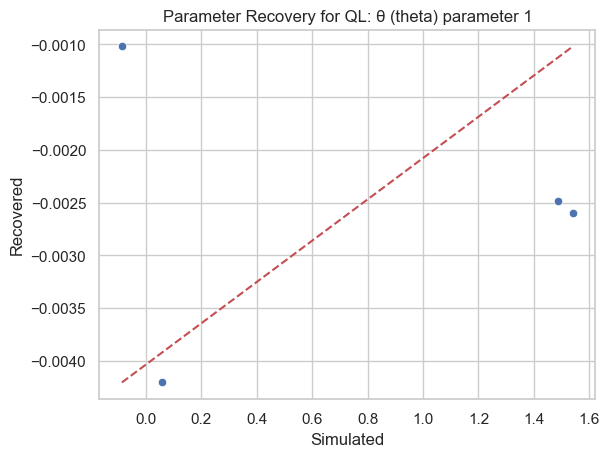

In [ ]:
#How to do it with our own simulated data:
# Organize recovery data from results and full_sims_hist
recovery_df = organize_recovery_data(fit_result, full_sims_hist)

# Generate plots
for mod in recovery_df['sim_model'].unique():
    mod_df = recovery_df[recovery_df['sim_model'] == mod]
    print(f"Plotting for model: {mod}")
    plot_recovery(mod_df, 'true_phi', 'rec_phi', f'Parameter Recovery for {mod}: φ (phi)')
    plot_recovery(mod_df, 'true_theta', 'rec_theta', f'Parameter Recovery for {mod}: θ (theta)')

Change the guide "guide_fn" in the fit_model() function to None. This will set it to a default guide that is automatically set and optimized. 

Qu.10. What happens to the fit? To the parameter recovery? 

Fitting model QL
[0] ELBO: -389.76, Best: -389.76
[100] ELBO: -353.63, Best: -280.93
Early stopping at step 136: no improvement in 50 steps.
Best parameters found:{'AutoMultivariateNormal.loc': tensor([-0.7307, -0.8789,  0.5274]), 'AutoMultivariateNormal.scale': tensor([0.1086, 0.1086, 0.1086]), 'AutoMultivariateNormal.scale_tril': tensor([[ 1.0000,  0.0000,  0.0000],
        [ 0.0131,  1.0000,  0.0000],
        [-0.0119, -0.0043,  1.0000]])}
Model QL accuracy: 0.91
Model QL balanced accuracy: 0.50
Model QL log likelihood: -127.27
Model QL AIC: 258.55
Model QL BIC: 265.96
Fitting model FP
[0] ELBO: -399.08, Best: -399.08
Early stopping at step 93: no improvement in 50 steps.
Best parameters found:{'AutoMultivariateNormal.loc': tensor([ 1.9822,  0.1240, -0.0174]), 'AutoMultivariateNormal.scale': tensor([0.1043, 0.1043, 0.1043]), 'AutoMultivariateNormal.scale_tril': tensor([[ 1.0000,  0.0000,  0.0000],
        [-0.0071,  1.0000,  0.0000],
        [-0.0100, -0.0013,  1.0000]])}
Model FP a

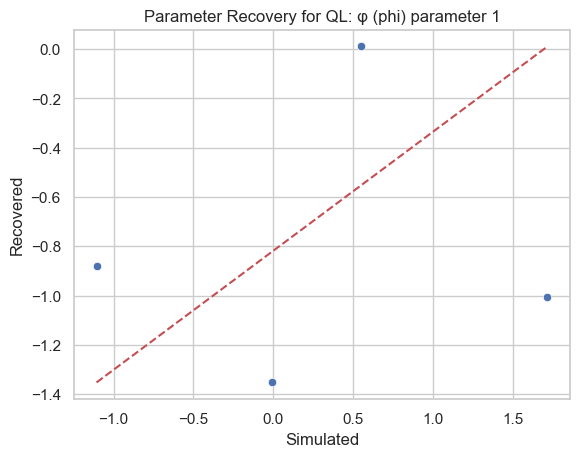

Plotting parameter 2 for Parameter Recovery for QL: φ (phi)


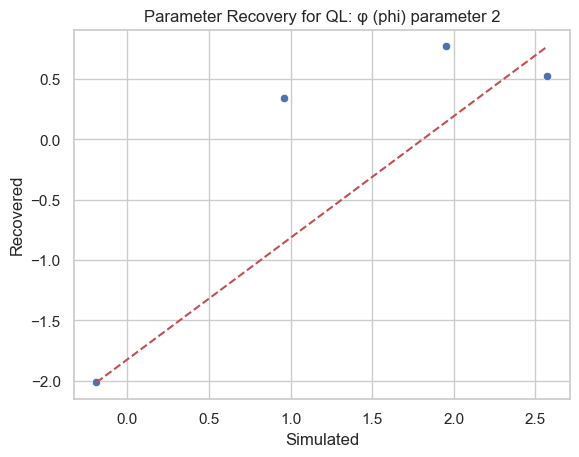

Number of parameters to plot: 1
Plotting parameter 1 for Parameter Recovery for QL: θ (theta)


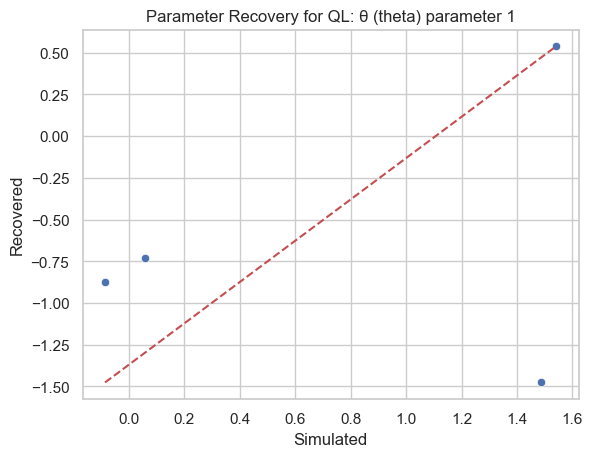

In [ ]:
fit_result = []
nb_sbj = 4 # Choose the number of simulated subjects to fit
for k in range(nb_sbj):
    sim_hist = pd.DataFrame(full_sims_hist[k]['history'])
    data = {'agent1_action': sim_hist['agent1_action'], 'agent2_action': sim_hist['agent2_action'], 'agent1_reward': sim_hist['agent1_reward']}
    for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
        print((f"Fitting model {fitted_model_name}"))

        if(fitted_model_name=="MIIL"):
            in_dict = {'game1': payoff_matrix_CG, 'game2': payoff_matrix_HaS, 'player': 1, 'dim_x': 3}
        elif(fitted_model_name=="Inf"):
            in_dict = {'game': payoff_matrix_CG, 'player': 1, 'dim_x': 1}
        else:
            in_dict = {'dim_x': 2}

        res = fit_model(data = data, model_fn = model_fn, guide_fn = None, in_dict = in_dict, n_steps=500, tolerance=1e-4, verbose=True, patience=50)
        goodness_of_fit = compute_goodness_of_fit(res, data)
        fit_result.append({'simulated_model': full_sims_hist[k]['model'], 'fitted_model': fitted_model_name, 'participant_nb': k, 'model_fit_result': res, 'goodness_of_fit': goodness_of_fit})    
            
        # Model accuracy
        accuracy = goodness_of_fit['accuracy']
        print(f"Model {fitted_model_name} accuracy: {accuracy:.2f}")

        # Model balanced accuracy
        balanced_accuracy = goodness_of_fit['balanced_accuracy']
        print(f"Model {fitted_model_name} balanced accuracy: {balanced_accuracy:.2f}")

        # Model log likelihood
        log_likelihood = goodness_of_fit['log_likelihood']
        print(f"Model {fitted_model_name} log likelihood: {log_likelihood:.2f}")

        # Model AIC
        aic = goodness_of_fit['aic']
        print(f"Model {fitted_model_name} AIC: {aic:.2f}")

        # Model BIC
        bic = goodness_of_fit['bic']
        print(f"Model {fitted_model_name} BIC: {bic:.2f}")

# Organize recovery data from results and full_sims_hist
recovery_df = organize_recovery_data(fit_result, full_sims_hist)

# Generate plots
for mod in recovery_df['sim_model'].unique():
    mod_df = recovery_df[recovery_df['sim_model'] == mod]
    print(f"Plotting for model: {mod}")
    plot_recovery(mod_df, 'true_phi', 'rec_phi', f'Parameter Recovery for {mod}: φ (phi)')
    plot_recovery(mod_df, 'true_theta', 'rec_theta', f'Parameter Recovery for {mod}: θ (theta)')        

## Model recovery – “Can I tell models apart?”

Suppose you have two or more competing models. You simulate data using one of them, and then try to fit all the models to this simulated data. If you’re doing it right, the correct model (the one that generated the data) should be the one you recover.

### Why does it matter?
If your model comparison can't identify the right model when you already know the answer, you shouldn't trust it on real data...

### How does it work?
- Pick several models.
- Simulate behavior from each model using known parameters.
- Fit all models to that simulated data.
- See if you correctly identify the model that generated the data.
- If not → data generated by your models is too similar, or the fitting procedure is flawed.


To represent a model recovery, we usually plot the confusion matrix showing how often the right model is chosen. For each simulated model, we plot the estimated frequencies after fitting all models. 

Qu.11.a) If we have 4 models (e.g. the QL, FP, Influence and MIIL models), how would this matrix look like if the model recovery is good? Plot a dummy recovery matrix that would represent a good model recovery.

Qu.11.b) Plot a dummy matrix that would represent a bad model recovery. What is wrong with your matrix? What would it mean in terms of your fitting procedure or models? 

Qu.12.c) Think about what you can possibly do to improve model recovery.

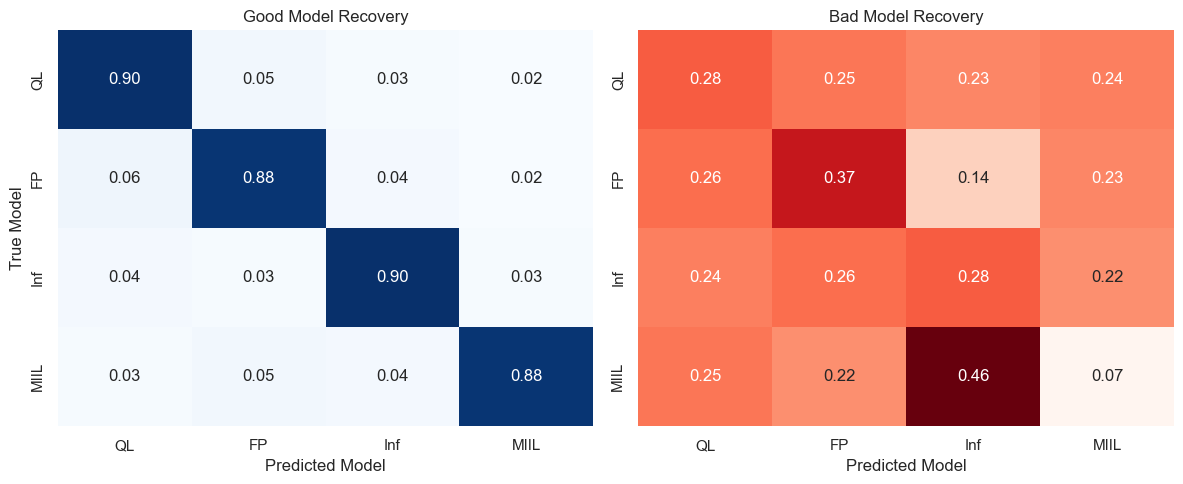

In [21]:
# Set up dummy 4x4 confusion matrix
# Good recovery matrix
good_matrix = np.array([
    [0.90, 0.05, 0.03, 0.02],
    [0.06, 0.88, 0.04, 0.02],
    [0.04, 0.03, 0.90, 0.03],
    [0.03, 0.05, 0.04, 0.88]
])

# Bad recovery matrix (near chance level performance for some models, misclassification for others)
bad_matrix = np.array([
    [0.28, 0.25, 0.23, 0.24],
    [0.26, 0.37, 0.14, 0.23],
    [0.24, 0.26, 0.28, 0.22],
    [0.25, 0.22, 0.46, 0.07]
])

# Model names
model_labels = ['QL', 'FP', 'Inf', 'MIIL']

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Good recovery plot
sns.heatmap(good_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=model_labels, yticklabels=model_labels, cbar=False, ax=axes[0])
axes[0].set_title("Good Model Recovery")
axes[0].set_xlabel("Predicted Model")
axes[0].set_ylabel("True Model")

# Bad recovery plot
sns.heatmap(bad_matrix, annot=True, fmt=".2f", cmap="Reds",
            xticklabels=model_labels, yticklabels=model_labels, cbar=False, ax=axes[1])
axes[1].set_title("Bad Model Recovery")
axes[1].set_xlabel("Predicted Model")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

Ideally, we would like to perform a model recovery on our simulated data. However, the fitting procedure will take a very long time. It would need parallelization.

End of session.

In [ ]:
# Run the following code only if you have enough time and resources

fit_results1 = []
for sim_model in all_models:
    print((f"Simulated model: {sim_model}"))
    sim = 0
    # Iterate through the full_sims_hist to fit models
    for entry in full_sims_hist:
        # Check if the entry matches the simulated model 
        # For simplicity, we select games from agents that played against a MIIL agent only, and only the first 4 simulations
        if entry['model'] == sim_model and entry['other_agent'] == 'MIIL' and entry['sim_id'] < 4:
            hist = pd.DataFrame(entry['history'])
            # Prepare data for fitting
            data = {'agent1_action': hist['agent1_action'], 'agent2_action': hist['agent2_action'], 'agent1_reward': hist['agent1_reward']}
            # Fit each model
            for fitted_model_name, (model_fn, guide_fn) in pyro_models.items():
                print((f"Fitting model {fitted_model_name}"))          
                
                # Prepare data for fitting
                if(fitted_model_name=="MIIL"):
                    in_dict = {'game1': payoff_matrix_CG, 'game2': payoff_matrix_HaS, 'player': 1, 'dim_x': 3}
                elif(fitted_model_name=="Inf"):
                    in_dict = {'game': payoff_matrix_CG, 'player': 1, 'dim_x': 1}
                else:
                    in_dict = {'dim_x': 2}

                # Fit the model
                result = fit_model(data = data, model_fn = model_fn, guide_fn = None, in_dict = in_dict, n_steps=500, tolerance=1e-4, verbose=True, patience=50)

                goodness_of_fit = compute_goodness_of_fit(res, data)
                fit_results1.append({'simulated_model': full_sims_hist[k]['model'], 'fitted_model': fitted_model_name, 'participant_nb': k, 'model_fit_result': res, 'goodness_of_fit': goodness_of_fit})    
                    
                # Model accuracy
                accuracy = goodness_of_fit['accuracy']
                print(f"Model {fitted_model_name} accuracy: {accuracy:.2f}")

                # Model balanced accuracy
                balanced_accuracy = goodness_of_fit['balanced_accuracy']
                print(f"Model {fitted_model_name} balanced accuracy: {balanced_accuracy:.2f}")

                # Model log likelihood
                log_likelihood = goodness_of_fit['log_likelihood']
                print(f"Model {fitted_model_name} log likelihood: {log_likelihood:.2f}")

                # Model AIC
                aic = goodness_of_fit['aic']
                print(f"Model {fitted_model_name} AIC: {aic:.2f}")

                # Model BIC
                bic = goodness_of_fit['bic']
                print(f"Model {fitted_model_name} BIC: {bic:.2f}")
                
        
            sim = sim + 1

# Organize recovery data from results and full_sims_hist
recovery_df = organize_recovery_data(fit_results1, full_sims_hist)

# Generate plots
for mod in recovery_df['sim_model'].unique():
    mod_df = recovery_df[recovery_df['sim_model'] == mod]
    print(f"Plotting for model: {mod}")
    plot_recovery(mod_df, 'true_phi', 'rec_phi', f'Parameter Recovery for {mod}: φ (phi)')
    plot_recovery(mod_df, 'true_theta', 'rec_theta', f'Parameter Recovery for {mod}: θ (theta)')  

# Organize
sim_models, fit_models, sim_to_elbo = organize_elbos_by_simmodel(fit_results1)

# RFX model recovery
conf_matrix = model_recovery_confusion(sim_models, fit_models, sim_to_elbo)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, sim_models, fit_models)
